# **Sesión 03: Exploración de Variables Categóricas y Análisis Multivariable**

***
***
***

## **Prework**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BEDU2023F3/Remoto_Datasets/Remoto athlete_olympic_events-clean.csv', index_col=0)

df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


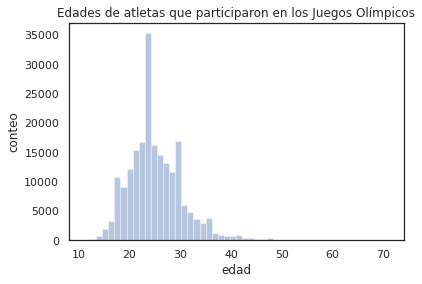

In [ ]:
sns.set(style='white')
ax = sns.distplot(df['age'], kde=False, norm_hist=False)
ax.set_title('Edades de atletas que participaron en los Juegos Olímpicos');
ax.set(xlabel='edad', ylabel='conteo');

In [ ]:
by_athlete = df.groupby(level=0)[['age', 'height', 'weight']].mean()
sex = df.groupby(level=0)['sex'].last()
merged = by_athlete.merge(sex, left_index=True, right_index=True)
males = by_athlete[merged['sex'] == 'M']
females = by_athlete[merged['sex'] == 'F']

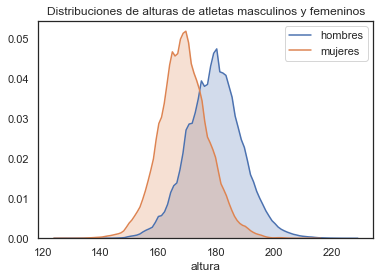

In [ ]:
ax = sns.distplot(males['height'], hist=False, kde_kws = {'shade': True}, label='hombres')
sns.distplot(females['height'], hist=False, kde_kws = {'shade': True}, ax=ax, label='mujeres')
ax.set_title('Distribuciones de alturas de atletas masculinos y femeninos');
ax.set(xlabel='altura');
ax.legend(loc='upper right');

In [ ]:
df['sport'].unique()

array(['Basketball', 'Judo', 'Speed Skating', 'Cross Country Skiing',
       'Ice Hockey', 'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Athletics', 'Alpine Skiing', 'Weightlifting', 'Wrestling', 'Luge',
       'Rowing', 'Bobsleigh', 'Swimming', 'Football', 'Equestrianism',
       'Shooting', 'Taekwondo', 'Boxing', 'Fencing', 'Diving', 'Canoeing',
       'Handball', 'Water Polo', 'Tennis', 'Cycling', 'Hockey',
       'Figure Skating', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Modern Pentathlon', 'Table Tennis',
       'Nordic Combined', 'Baseball', 'Rhythmic Gymnastics',
       'Freestyle Skiing', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Ski Jumping', 'Curling', 'Golf',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton', 'Rugby',
       'Tug-Of-War', 'Art Competitions', 'Lacrosse', 'Motorboating'],
      dtype=object)

In [ ]:
df['sport'].isna().sum()

0

In [ ]:
df['sport'].dtype

dtype('O')

In [ ]:
sports = df['sport'].value_counts()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, '')]

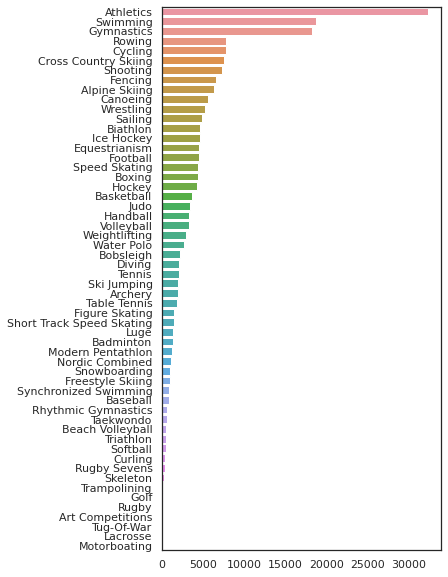

In [ ]:
plt.figure(figsize=(5, 10))
ax = sns.barplot(sports, sports.index)
ax.set(xlabel='')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


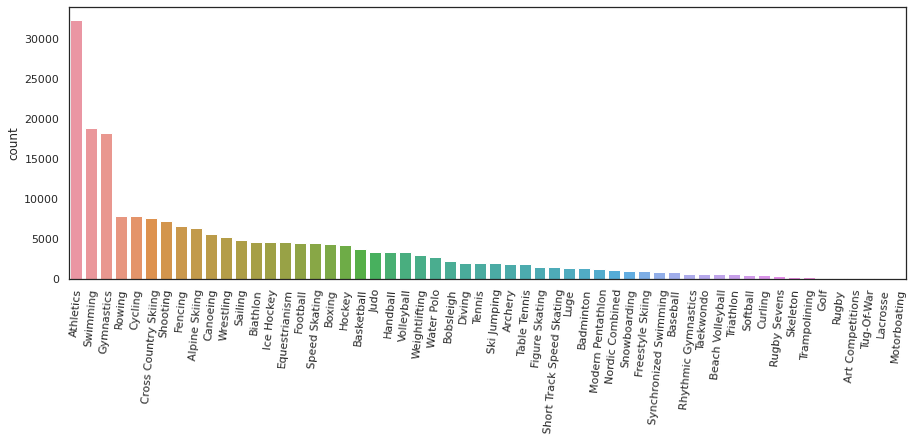

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(sports.index, sports)
ax.set(xlabel='', ylabel='count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=85);

In [ ]:
df_2 = pd.read_json('/content/drive/MyDrive/BEDU2023F3/Remoto_Datasets/Remoto zomato_reviews-clean.json')

In [ ]:
df_2.head()

,has_online_delivery,price_range,currency,name,cuisines,location.address,location.city,user_rating
0,1,3,Rs.,Hauz Khas Social,"Continental, American, Asian, North Indian","9-A & 12, Hauz Khas Village, New Delhi",New Delhi,Very Good
1,0,3,Rs.,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...","C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,Excellent
2,1,2,Rs.,The Hudson Cafe,"Cafe, Italian, Continental, Chinese","2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,Very Good
3,0,3,Rs.,Summer House Cafe,"Italian, Continental","1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,Very Good
4,0,3,Rs.,38 Barracks,"North Indian, Italian, Asian, American","M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,Very Good


In [ ]:
df_2['user_rating'].unique()

array(['Very Good', 'Excellent', 'Poor', 'Good', 'Average', 'Not rated'],
      dtype=object)

In [ ]:
counts = df_2['user_rating'].value_counts()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


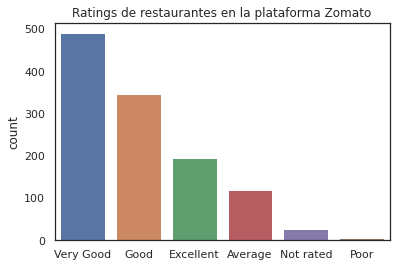

In [ ]:
ax = sns.barplot(counts.index, counts)
ax.set_title('Ratings de restaurantes en la plataforma Zomato')
ax.set(ylabel='count');

In [ ]:
counts

Very Good    490
Good         346
Excellent    194
Average      119
Not rated     26
Poor           5
Name: user_rating, dtype: int64

In [ ]:
as_percentage = counts * 100 / counts.sum()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


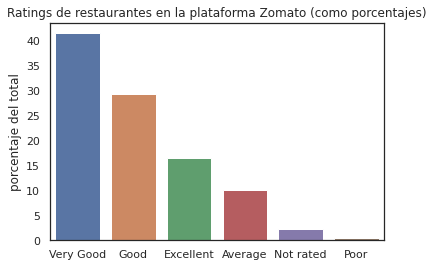

In [ ]:
ax = sns.barplot(as_percentage.index, as_percentage)
ax.set_title('Ratings de restaurantes en la plataforma Zomato (como porcentajes)')
ax.set(ylabel='porcentaje del total');

In [ ]:
df_2.head()

,has_online_delivery,price_range,currency,name,cuisines,location.address,location.city,user_rating
0,1,3,Rs.,Hauz Khas Social,"Continental, American, Asian, North Indian","9-A & 12, Hauz Khas Village, New Delhi",New Delhi,Very Good
1,0,3,Rs.,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...","C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,Excellent
2,1,2,Rs.,The Hudson Cafe,"Cafe, Italian, Continental, Chinese","2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,Very Good
3,0,3,Rs.,Summer House Cafe,"Italian, Continental","1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,Very Good
4,0,3,Rs.,38 Barracks,"North Indian, Italian, Asian, American","M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,Very Good


In [ ]:
crosstab = pd.crosstab(df_2['price_range'], df_2['user_rating']).rename_axis('rating', axis=1).rename_axis('price range')

In [ ]:
crosstab

rating,Average,Excellent,Good,Not rated,Poor,Very Good
price range,,,,,,
1,12,9,33,1,0,19
2,47,37,116,3,2,132
3,41,84,141,3,1,218
4,19,64,56,19,2,121


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

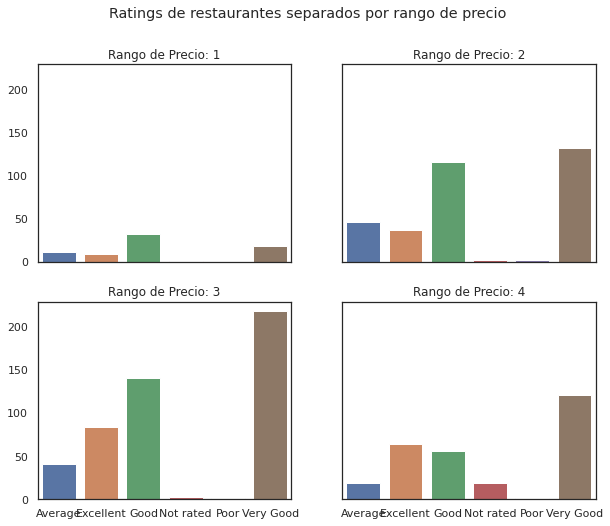

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
sns.barplot(crosstab.columns, crosstab.loc[1], ax=axs[0, 0])
sns.barplot(crosstab.columns, crosstab.loc[2], ax=axs[0, 1])
sns.barplot(crosstab.columns, crosstab.loc[3], ax=axs[1, 0])
sns.barplot(crosstab.columns, crosstab.loc[4], ax=axs[1, 1])
sns.set_style('whitegrid')

for i in axs:
    for ax in i:
        ax.set(xlabel='', ylabel='')
        
axs[0, 0].set_title('Rango de Precio: 1')
axs[0, 1].set_title('Rango de Precio: 2')
axs[1, 0].set_title('Rango de Precio: 3')
axs[1, 1].set_title('Rango de Precio: 4')
fig.suptitle('Ratings de restaurantes separados por rango de precio');

In [ ]:
males

,age,height,weight
athlete_id,,,
1,24.0,180.0,80.0
2,23.0,170.0,60.0
6,32.0,188.0,75.0
7,32.0,183.0,72.0
9,26.0,186.0,96.0
...,...,...,...
135566,21.0,175.0,75.0
135567,26.0,183.0,72.0
135569,29.0,179.0,89.0


In [ ]:
females

,age,height,weight
athlete_id,,,
5,24.333333,185.0,82.0
13,32.000000,159.0,55.5
14,32.000000,171.0,65.0
22,22.000000,170.0,125.0
26,17.000000,169.0,65.0
...,...,...,...
135550,27.000000,161.0,53.0
135553,25.800000,168.0,80.0
135560,36.000000,171.0,63.0


In [ ]:
merged

,age,height,weight,sex
athlete_id,,,,
1,24.000000,180.0,80.0,M
2,23.000000,170.0,60.0,M
5,24.333333,185.0,82.0,F
6,32.000000,188.0,75.0,M
7,32.000000,183.0,72.0,M
...,...,...,...,...
135567,26.000000,183.0,72.0,M
135568,33.000000,171.0,69.0,F
135569,29.000000,179.0,89.0,M


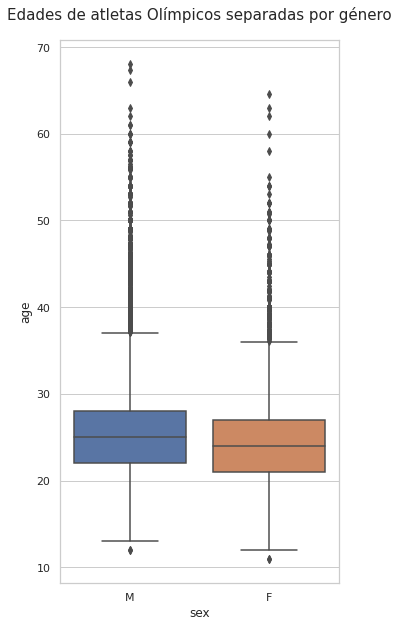

In [ ]:
fig = plt.figure(figsize=(5, 10))
ax = sns.boxplot(x='sex', y='age', data=merged);
ax.set_title('Edades de atletas Olímpicos separadas por género', fontsize=15, pad=20);

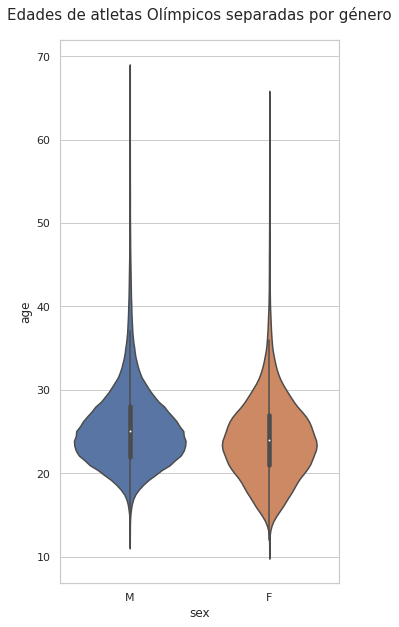

In [ ]:
fig = plt.figure(figsize=(5, 10))
ax = sns.violinplot(x='sex', y='age', data=merged);
ax.set_title('Edades de atletas Olímpicos separadas por género', fontsize=15, pad=20);

In [ ]:
df_2.to_json('/content/drive/MyDrive/BEDU2023F3/Remoto_Datasets/Remoto zomato_reviews-clean.json')

## **Work**


## Sesión 03: Exploración de Variables Categóricas y Análisis Multivariable

### 1. Objetivos

- Identificar distintas técnicas para explorar y visualizar variables categóricas.
- Añadir anotaciones a nuestras gráficas para hacerlas más comprensibles.
- Utilizar gráficas de barras.
- Graficar un conjunto de datos agrupado de acuerdo a dos variables categóricas.
- Producir más de una gráfica al mismo tiempo para compararlas.
- Graficar un conjunto de datos numéricos agrupados de acuerdo a una variable categórica.

### 2. Contenido

<ins>Variables Categóricas</ins>

En la sesión pasada aprendimos a explorar la distribución de variables numéricas. ¿Qué hay de las categóricas? Hay muchas técnicas más que han sido desarrolladas para analizar variables categóricas, como las gráficas de barras y las tablas de contigencia. En esta sesión aprenderemos a utilizar estas técnicas.

También aprenderemos a darle un poco más de claridad a nuestras gráficas añadiendo títulos y leyendas. Además, aprenderemos a producir más de una gráfica al mismo tiempo para poder comparar entre múltiples categorías.

>

---

<ins>Anotando nuestras gráficas</ins>

En la sesión anterior aprendimos a realizar gráficas de distribuciones de datos, pero no vimos cómo añadir anotaciones para darle más claridad a nuestras visualizaciones.

Un científico de datos es un comunicador, y como tal es muy importante que podamos generar gráficas comprensibles y fáciles de interpretar para que la información que encontremos pueda ser transmitida.

> 

[**`Ejemplo 1`**](Ejemplo-01/anotando_graficas.ipynb)
[**`Reto 1`**](Reto-01/anotando_graficas.ipynb)

---



## Ejemplo 1: Anotando gráficas

### 1. Objetivos:
    - Aprender a añadir títulos, anotaciones y leyendas a nuestras gráficas
    - Aprender a cambiar los tamaños de nuestras gráficas y modificar la dirección de nuestros tics
 
---
    
### 2. Desarrollo:

Vamos a aprender a añadir anotaciones a nuestras gráficas para que sean mucho más comprensibles.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/BEDU2023F3/Remoto_Datasets/Remoto athlete_olympic_events-clean.csv', index_col=0)

df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206165 entries, 1 to 135571
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   name    206165 non-null  object 
 1   sex     206165 non-null  object 
 2   age     206165 non-null  float64
 3   height  206165 non-null  float64
 4   weight  206165 non-null  float64
 5   team    206165 non-null  object 
 6   noc     206165 non-null  object 
 7   games   206165 non-null  object 
 8   year    206165 non-null  int64  
 9   season  206165 non-null  object 
 10  city    206165 non-null  object 
 11  sport   206165 non-null  object 
 12  event   206165 non-null  object 
 13  medal   206165 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 23.6+ MB


Añadir títulos y nombres para nuestros ejes es tan fácil como llamar el método `set`. Anteriormente habíamos estado llamando nuestros métodos de Seaborn sin asignar los resultados a ninguna variable. Si asignamos nuestro resultado a la variable `ax`, podemos ahora llamar el método `set` de esa variable para anotar nuestra gráfica:

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


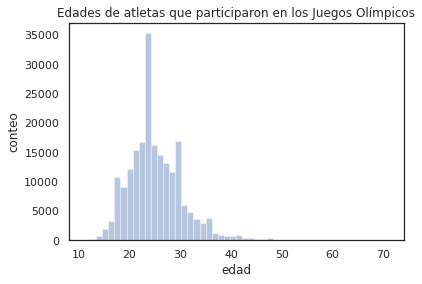

In [6]:
ax = sns.distplot(df['age'], kde=False, norm_hist=False)
ax.set(title='Edades de atletas que participaron en los Juegos Olímpicos', xlabel='edad', ylabel='conteo');

Observa que he colocado un punto y coma al final de la última línea. Esto se hace para que Jupyter Notebooks no me muestre el output de la última línea, ya que esto ensuciaría un poco mi visualización.

En el caso de que tengamos dos o más gráficas (o categorías) al mismo tiempo, podemos añadir una leyenda a nuestra gráfica para poder diferenciar nuestros datos:

In [8]:
by_athlete = df.groupby(level=0)[['age', 'height', 'weight']].mean()  # level=0 p agrupar por renglones
sex = df.groupby(level=0)['sex'].last()
merged = by_athlete.merge(sex, left_index=True, right_index=True)  # la tabla de la izq es by_athlete y la de la der es sex
males = by_athlete[merged['sex'] == 'M']
females = by_athlete[merged['sex'] == 'F']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


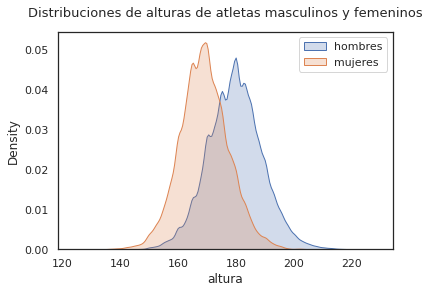

In [9]:
ax = sns.distplot(males['height'], hist=False, kde_kws = {'shade': True}, label='hombres')
sns.distplot(females['height'], hist=False, kde_kws = {'shade': True}, ax=ax, label='mujeres')
ax.set_title('Distribuciones de alturas de atletas masculinos y femeninos', fontsize=13, pad=15);
ax.set(xlabel='altura');
ax.legend(loc='upper right');

In [11]:
males['height'].std()

9.460688465778412

In [12]:
females['height'].std()

8.494108191215657

En la gráfica anterior usamos el método `set_title` en vez del genérico `set` para poder agregar el tamaño de la letra (`fontsize`) y el tamaño de la separación entre el título y la gráfica (`pad`).

---

También podemos cambiar el tamaño de nuestras gráficas. Para eso tendremos que echar mano de la librería sobre la cual está construida `seaborn`: `matplotlib`. `matplotlib` es la librería de visualizaciones en Python más conocida y utilizada. Algunas de las nuevas librerías que son muy famosas, como `seaborn` están construidas sobre `matplotlib`. Esto quiere decir que para poder acceder a todo el poder de las visualizaciones en Python es importante saber cómo funcionan ambas.

Por ahora sólo vamos a ver lo siguiente:

Cada vez que creas una nueva gráfica con `seaborn`, esta gráfica está contenida dentro de algo que llamamos `figures` en `matplotlib`. Una `figure` puede contener múltiples gráficas. Cada que generas una gráfica con `seaborn`, una nueva `figure` se genera automáticamente. Podemos generar manualmente la `figure` para después utilizarla para personalizar nuestra gráfica. Para determinar el tamaño de nuestra gráfica podemos hacer lo siguiente:

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


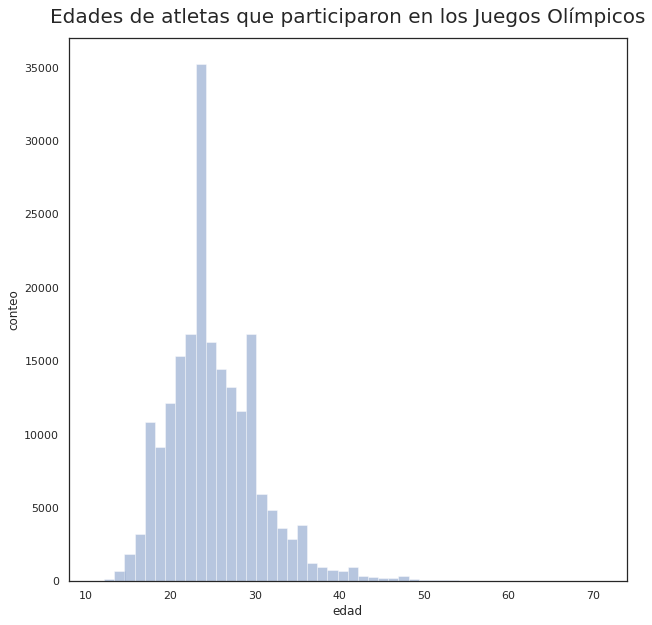

In [55]:
fig = plt.figure(figsize=(10, 10))
ax = sns.distplot(df['age'], kde=False, norm_hist=False)
ax.set_title('Edades de atletas que participaron en los Juegos Olímpicos', fontsize=20, pad=15)
ax.set(xlabel='edad', ylabel='conteo');

In [17]:
df['age'].mean()

25.055508937016466

In [19]:
df['age'].median()

24.0

In [18]:
df['age'].mode()

0    23.0
dtype: float64

A través de todo el módulo, iremos poco a poco viendo cómo modificar nuestras gráficas para que se vean bien y sean más comprensibles.

***

## Reto 1: Anotando gráficas

### 1. Objetivos:
    - Aprender a hacer gráficas más claras añadiendo anotaciones y cambiando el tamaño
 
---
    
### 2. Desarrollo:

A continuación verás algunas gráficas que han sido realizadas de antemano. Tu Reto es añadir títulos, nombres de ejes, leyendas, etc. para que estas gráficas sean más comprensibles. En el caso de que sea necesario, aumenta también el tamaño de la gráfica

Para que puedas echarle un vistazo al tema de este dataset, [visita este link](https://www.kaggle.com/uciml/pima-indians-diabetes-database). Es importante saber de qué hablamos para saber anotar correctamente nuestras gráficas.

Entonces:

1. Aumenta de tamaño la gráfica si consideras que sería más comprensible de esa manera
2. Donde sea adecuado, añade títulos, nombres de ejes y leyendas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/BEDU2023F3/Remoto_Datasets/Remoto diabetes-clean.csv', index_col=0)

df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### a)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

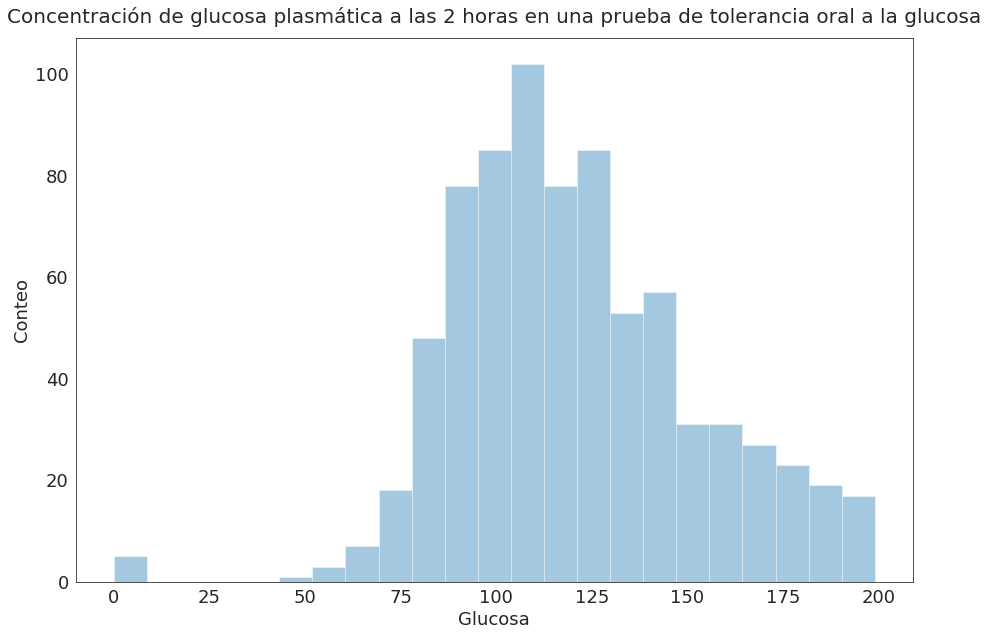

In [6]:
plt.figure(figsize=(15, 10))
ax = sns.distplot(df['glucose'], kde=False, norm_hist=False)
ax.set_title('Concentración de glucosa plasmática a las 2 horas en una prueba de tolerancia oral a la glucosa', fontsize=20, pad=15);
ax.set_xlabel('Glucosa', fontsize=18)
ax.set_ylabel('Conteo', fontsize=18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

### b)

In [8]:
pregnancy_counts = df['pregnancies'].value_counts()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

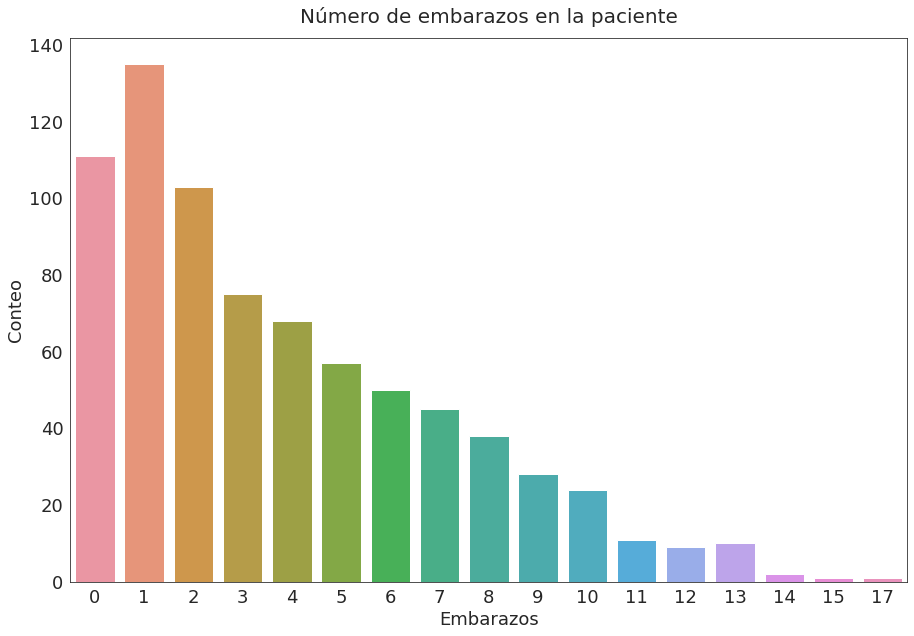

In [9]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(pregnancy_counts.index, pregnancy_counts)
ax.set_title('Número de embarazos en la paciente', fontsize=20, pad=15);
ax.set_xlabel('Embarazos', fontsize=18)
ax.set_ylabel('Conteo', fontsize=18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

### c)

In [11]:
healthy = df[df['outcome'] == 0]
sick = df[df['outcome'] == 1]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.016,
        0.018]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

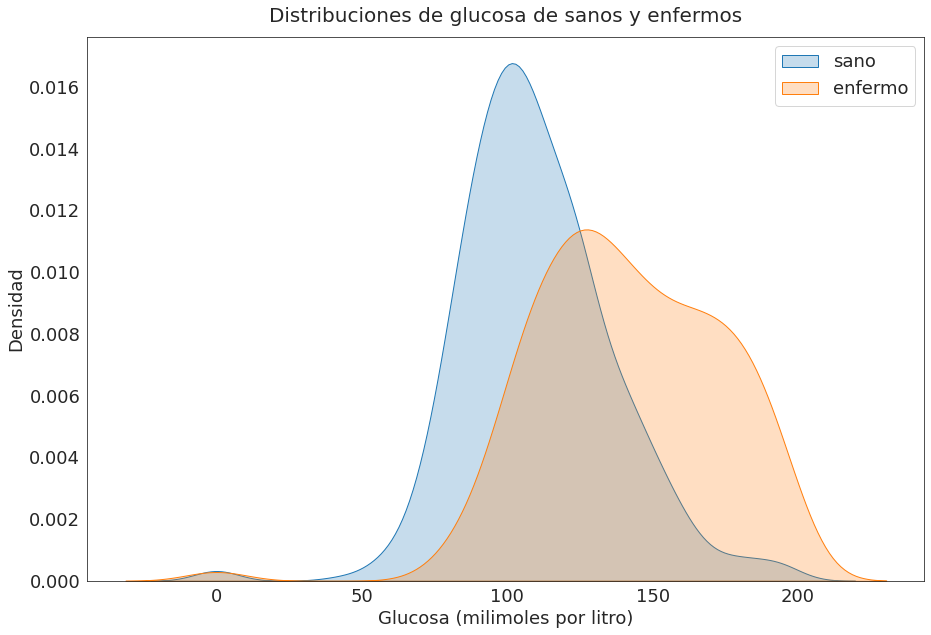

In [12]:
plt.figure(figsize=(15, 10))
ax = sns.distplot(healthy['glucose'], hist=False, kde_kws={'shade': True}, label='sano')
sns.distplot(sick['glucose'], hist=False, kde_kws={'shade': True}, ax=ax, label='enfermo')

ax.set_title('Distribuciones de glucosa de sanos y enfermos', fontsize=20, pad=15);
ax.legend(loc='upper right', fontsize=18);

ax.set_xlabel('Glucosa (milimoles por litro)', fontsize=18)
ax.set_ylabel('Densidad', fontsize=18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

### d)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

(array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

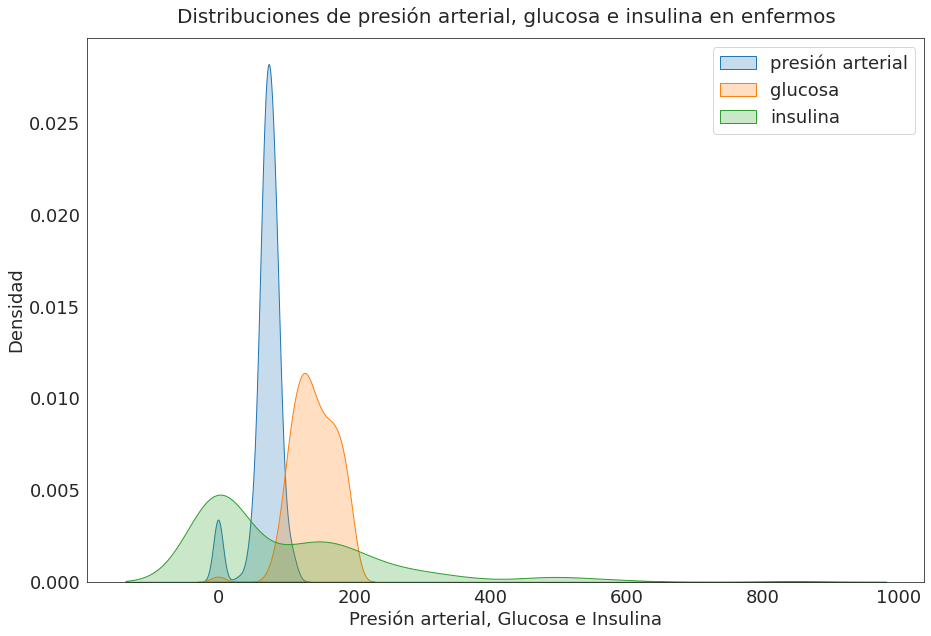

In [14]:
plt.figure(figsize=(15, 10))
ax = sns.distplot(sick['blood_pressure'], hist=False, kde_kws={'shade': True}, label='presión arterial')
az = sns.distplot(sick['glucose'], hist=False, kde_kws={'shade': True}, ax=ax, label='glucosa')
sns.distplot(sick['insulin'], hist=False, kde_kws={'shade': True}, ax = az, label='insulina')

ax.set_title('Distribuciones de presión arterial, glucosa e insulina en enfermos', fontsize=20, pad=15);
ax.legend(loc='upper right', fontsize=18);

ax.set_xlabel('Presión arterial, Glucosa e Insulina', fontsize=18)
ax.set_ylabel('Densidad', fontsize=18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

***
***

<ins>Gráficas de barras y la Moda</ins>

Así como los histogramas nos sirven para visualizar las distribuciones de variables numéricas, las gráficas de barras son una herramienta muy común para visualizar los conteos de frecuencias de variables categóricas.

En una gráfica de barras, el eje y puede indicar tanto conteo de frecuencias como el porcentaje de la frecuencia. Veamos cómo realizar ambas.

> 

[**`Ejemplo 2`**](Ejemplo-02/graficas_de_barras.ipynb)
[**`Reto 2`**](Reto-02/graficas_de_barras.ipynb)

---



## Ejemplo 2: Gráficas de barras

### 1. Objetivos:
    - Aprender a realizar gráficas de barras con frecuencias y porcentajes
 
---
    
### 2. Desarrollo:

In [20]:
import pandas as pd
import seaborn as sns
sns.set_style('white')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [21]:
df = pd.read_json('/content/drive/MyDrive/BEDU2023F3/Remoto_Datasets/Remoto zomato_reviews-clean.json')

df.head()

,has_online_delivery,price_range,currency,name,cuisines,location.address,location.city,user_rating
0,1,3,Rs.,Hauz Khas Social,"Continental, American, Asian, North Indian","9-A & 12, Hauz Khas Village, New Delhi",New Delhi,Very Good
1,0,3,Rs.,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...","C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,Excellent
2,1,2,Rs.,The Hudson Cafe,"Cafe, Italian, Continental, Chinese","2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,Very Good
3,0,3,Rs.,Summer House Cafe,"Italian, Continental","1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,Very Good
4,0,3,Rs.,38 Barracks,"North Indian, Italian, Asian, American","M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,Very Good


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180 entries, 0 to 1179
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   has_online_delivery  1180 non-null   int64 
 1   price_range          1180 non-null   int64 
 2   currency             1180 non-null   object
 3   name                 1180 non-null   object
 4   cuisines             1180 non-null   object
 5   location.address     1180 non-null   object
 6   location.city        1180 non-null   object
 7   user_rating          1180 non-null   object
dtypes: int64(2), object(6)
memory usage: 83.0+ KB


En este dataset tenemos una variable llamada 'user_rating' que es categórica. Para saber si es categórica podemos primero revisar con el método `unique` para ver todos los valores únicos contenidos en esa columna:

In [22]:
df['user_rating'].unique()

array(['Very Good', 'Excellent', 'Poor', 'Good', 'Average', 'Not rated'],
      dtype=object)

In [24]:
df['user_rating'].nunique()

6

`nunique` nos da el número de categorías que tenemos.

Ahora, para poder graficar nuestra variable como gráfica de barras necesitamos los conteos de frecuencias de cada categoría (es decir, cuántas veces aparece cada categoría. Para eso `pandas` nos ofrece un método llamado `value_counts`:

In [25]:
df['user_rating'].value_counts()

Very Good    490
Good         346
Excellent    194
Average      119
Not rated     26
Poor           5
Name: user_rating, dtype: int64

El método nos regresa una `Serie` con los nombres de la categorías como índices y los conteos como valores. Esta tabla la podemos usar para generar nuestra gráfica:

In [26]:
counts = df['user_rating'].value_counts()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


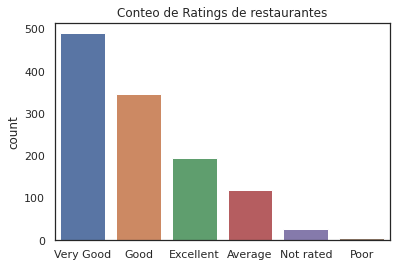

In [27]:
ax = sns.barplot(counts.index, counts)
ax.set_title('Conteo de Ratings de restaurantes')
ax.set(ylabel='count');

Ahora, si queremos que el eje y sean porcentajes en vez de conteos, podemos simplemente transformar nuestra `Serie` `counts` con una simple regla de 3:

In [28]:
counts * 100 / counts.sum()

Very Good    41.525424
Good         29.322034
Excellent    16.440678
Average      10.084746
Not rated     2.203390
Poor          0.423729
Name: user_rating, dtype: float64

In [29]:
as_percentages = counts * 100 / counts.sum()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


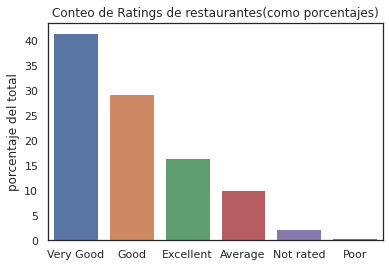

In [30]:
ax = sns.barplot(as_percentages.index, as_percentages)
ax.set_title('Conteo de Ratings de restaurantes(como porcentajes)')
ax.set(ylabel='porcentaje del total');

Si quieres acomodar los nombres de tus tics en el eje x, puedes utilizar el siguiente código para cambiarles la rotación:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


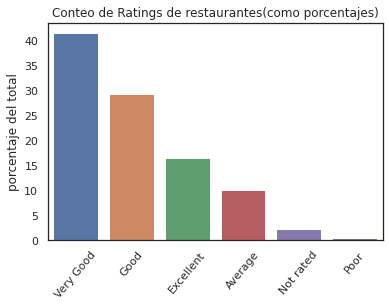

In [31]:
ax = sns.barplot(as_percentages.index, as_percentages)
ax.set_title('Conteo de Ratings de restaurantes(como porcentajes)')
ax.set(ylabel='porcentaje del total')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

En este caso no había mucha necesidad de rotar los nombres, pero hay veces que rotar los nombres y/o cambiar el tamaño de la gráfica es la única manera de hacerlos comprensibles.

---

Hay veces que resulta más cómodo y comprensible acomodar nuestras barras de manera horizontal. Esto puede hacerse muy fácilmente agregando la bandera `orient='h'` y cambiando el orden de nuestros inputs:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


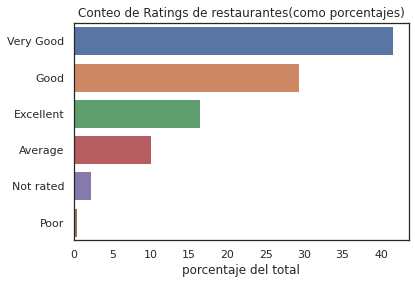

In [32]:
ax = sns.barplot(as_percentages, as_percentages.index, orient='h')
ax.set_title('Conteo de Ratings de restaurantes(como porcentajes)')
ax.set(xlabel='porcentaje del total');

#### La Moda

La moda es el "valor típico" de nuestra variable categórica. Representa la categoría que más veces aparece en nuestro conjunto de datos.

Podemos extraer la moda de la tabla de `value_counts` o de la gráfica de barras, pero `pandas` también ofrece un método para obtenerla fácilmente:

In [33]:
df['user_rating'].mode()

0    Very Good
dtype: object

***

## Reto 2: Gráficas de barras

### 1. Objetivos:
    - Aprender a hacer gráficas de barras de distintos tipos
 
---
    
### 2. Desarrollo:

Para este ejercicio vamos a utilizar el dataset 'melbourne_housing-clean.csv'. La fuente original [está aquí](https://www.kaggle.com/anthonypino/melbourne-housing-market), en caso de que quieras recordar de qué trata.

Vamos a realizar 3 gráficas de barras utilizando este dataset. Las instrucciones para cada una son las siguientes:

1. Gráfica de barras *verticales* usando la columna `rooms`. El eje y será el *conteo de frecuencia* de cada categoría. Las barras tienen que quedar *ordenadas en orden descendente* (es decir, de la más larga a la màs corta). Para lograr ordenarlas, tendrás que revisar [la documentación](https://seaborn.pydata.org/generated/seaborn.barplot.html) de la gráfica de barras de Seaborn.

2. Gráfica de barras *verticales* de la columna `types`. El eje y será el *porcentaje de frecuencia* de cada categoría.

3. Gráfica de barras *h*orizontales* de la columna `council_area`. El eje x será el *conteo de frecuencia* de cada categoría.

**Todas** las gráficas deberán de tener títulos y nombres adecuados para los ejes. También deberán de tener el tamaño correcto para que la visualización sea comprensible.

***

1. Gráfica de barras verticales usando la columna rooms. El eje y será el conteo de frecuencia de cada categoría. Las barras tienen que quedar ordenadas en orden descendente (es decir, de la más larga a la màs corta). Para lograr ordenarlas, tendrás que revisar la documentación de la gráfica de barras de Seaborn.

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

df = pd.read_csv('/content/drive/MyDrive/BEDU2023F3/Remoto_Datasets/Remoto melbourne_housing-clean.csv', index_col=0)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


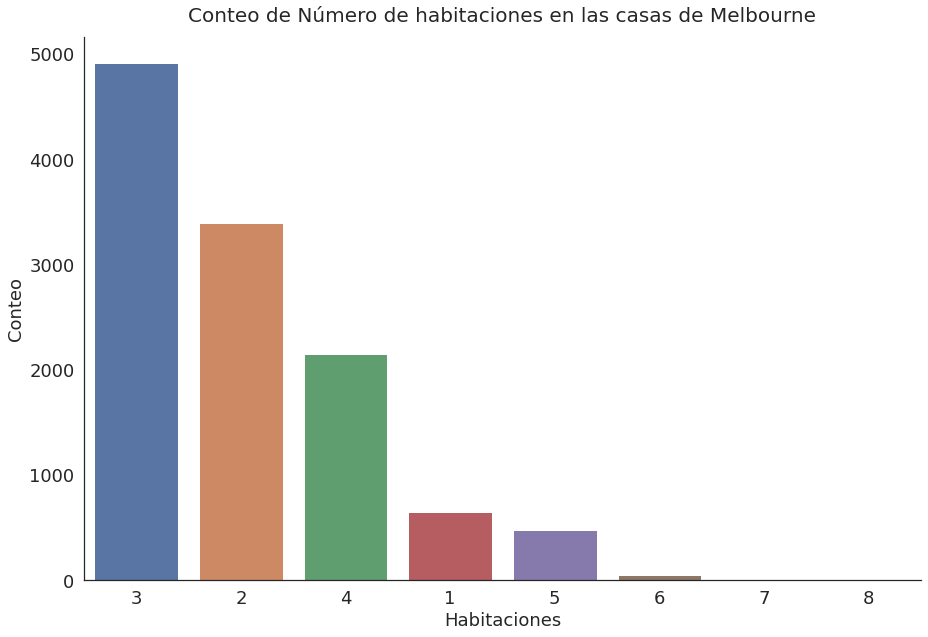

In [71]:
plt.figure(figsize=(15, 10))
rooms_count = df['rooms'].value_counts()
ax = sns.barplot(rooms_count.index, rooms_count, order=rooms_count.index)

ax.set_title('Conteo de Número de habitaciones en las casas de Melbourne', fontsize=20, pad=15);
ax.set_xlabel('Habitaciones', fontsize=18)
ax.set_ylabel('Conteo', fontsize=18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

sns.despine()

2. Gráfica de barras verticales de la columna types. El eje y será el porcentaje de frecuencia de cada categoría.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


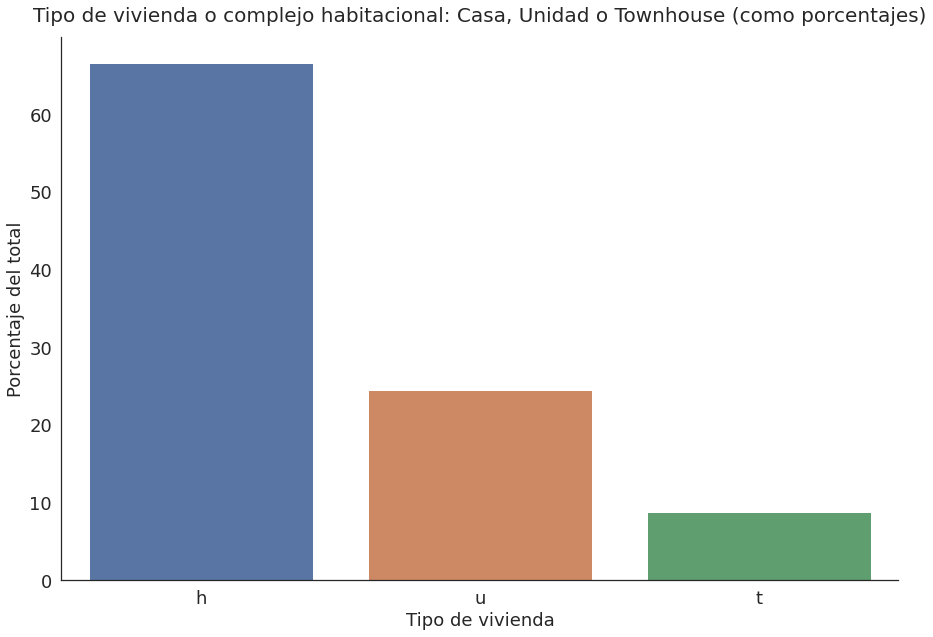

In [75]:
plt.figure(figsize=(15, 10))
type_counts = df['type'].value_counts()
type_counts = type_counts * 100 / type_counts.sum()
ax = sns.barplot(type_counts.index, type_counts)


ax.set_title('Tipo de vivienda o complejo habitacional: Casa, Unidad o Townhouse (como porcentajes)', fontsize=20, pad=15);
ax.set_xlabel('Tipo de vivienda', fontsize=18)
ax.set_ylabel('Porcentaje del total', fontsize=18)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
plt.yticks(fontsize=18)

sns.despine()

3. Gráfica de barras horizontales* de la columna council_area. El eje x será el conteo de frecuencia de cada categoría.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

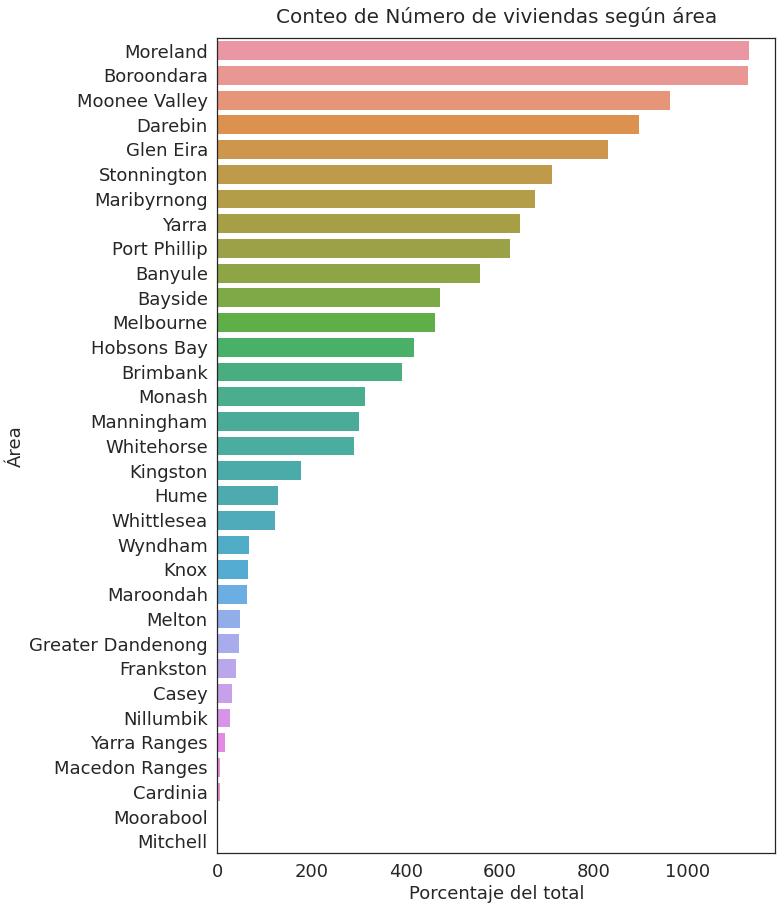

In [74]:
plt.figure(figsize=(10, 15))
council_counts = df['council_area'].value_counts()
ax = sns.barplot(council_counts, council_counts.index, orient='h')

ax.set_title('Conteo de Número de viviendas según área', fontsize=20, pad=15)
ax.set_ylabel('Área', fontsize=18)
ax.set_xlabel('Porcentaje del total', fontsize=18);

ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)
plt.xticks(fontsize=18)

***
***

<ins>Gráficas de pie</ins>

Un pequeño comentario acerca de las gráficas de pie:

Las gráficas de pie, aunque son muy utilizadas en la media popular, son gráficas en realidad bastante inefectivas. Para el cerebro humano es muy difícil comparar los distintos tamaños de los pedazos del pie, lo cual se presta a muchas malinterpretaciones.

Es recomendable usar gráficas de barras en vez de gráficas de pie. Si quieres saber más acerca de las razones por las que hay que evitar las gráficas de pie, puedes ir a este link: https://www.perceptualedge.com/articles/visual_business_intelligence/save_the_pies_for_dessert.pdf

> 

---

<ins>Tablas de contigencia e indexación en múltiples niveles</ins>

Es común que tengamos más de una variable categórica en nuestros conjuntos. Si queremos realizar un conteo de frecuencias usando dos o más variables categóricas para agrupar a nuestros datos podemos usar lo que se llama "tablas de contigencia".

`pandas` ofrece un método llamado `crosstab` que nos permite realizar estas tablas en un santiamén.

¡También aprovecharemos los resultados de nuestro método `crosstab` para aprender a indexar `DataFrames` con múltiples niveles de columnas!

> 

[**`Ejemplo 3`**](Ejemplo-03/tablas_de_contingencia.ipynb)
[**`Reto 3`**](Reto-03/tablas_de_contingencia.ipynb)

---



## Ejemplo 3: Tablas de contingencia

### 1. Objetivos:
    - Aprender a generar tablas de contingencia usando el método `crosstab`
 
---
    
### 2. Desarrollo:

In [34]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [35]:
df = pd.read_json('/content/drive/MyDrive/BEDU2023F3/Remoto_Datasets/Remoto zomato_reviews-clean.json')

df.head()

,has_online_delivery,price_range,currency,name,cuisines,location.address,location.city,user_rating
0,1,3,Rs.,Hauz Khas Social,"Continental, American, Asian, North Indian","9-A & 12, Hauz Khas Village, New Delhi",New Delhi,Very Good
1,0,3,Rs.,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...","C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,Excellent
2,1,2,Rs.,The Hudson Cafe,"Cafe, Italian, Continental, Chinese","2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,Very Good
3,0,3,Rs.,Summer House Cafe,"Italian, Continental","1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,Very Good
4,0,3,Rs.,38 Barracks,"North Indian, Italian, Asian, American","M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,Very Good


Podemos usar el método `crosstab` para generar tablas de contingencia usando dos de nuestras variables categóricas:

In [36]:
pd.crosstab(df['price_range'], df['user_rating'])

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good
price_range,,,,,,
1,12,9,33,1,0,19
2,47,37,116,3,2,132
3,41,84,141,3,1,218
4,19,64,56,19,2,121


Podemos obtener una columna y una fila con los totales añadiendo la bandera `margins` y `margins_name`:

In [37]:
pd.crosstab(df['price_range'], df['user_rating'], margins=True, margins_name='total')

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good,total
price_range,,,,,,,
1,12,9,33,1,0,19,74
2,47,37,116,3,2,132,337
3,41,84,141,3,1,218,488
4,19,64,56,19,2,121,281
total,119,194,346,26,5,490,1180


Como puedes observar, el índice está indicando la primera agrupación de nuestros datos (la columna 'price_range'), mientras que las columnas indican la segunda agrupación (la columna 'user_rating').

---

También podemos añadir una variable categórica más para generar múltiples niveles en las columnas:

In [38]:
pd.crosstab(df['price_range'], [df['has_online_delivery'], df['user_rating']], margins=True, margins_name='total')

has_online_delivery       0                                               1  \
user_rating         Average Excellent Good Not rated Poor Very Good Average   
price_range                                                                   
1                        12         8   32         1    0        15       0   
2                        47        30  104         3    1        99       0   
3                        40        70  132         3    1       183       1   
4                        19        61   52        19    2       113       0   
total                   118       169  320        26    4       410       1   

has_online_delivery                               total  
user_rating         Excellent Good Poor Very Good        
price_range                                              
1                           1    1    0         4    74  
2                           7   12    1        33   337  
3                          14    9    0        35   488  
4                           3    4    0         8   281  
total                      25   26    1        80  1180

### Múltiples niveles en columnas

Es un buen momento para aprender a indexar múltiples niveles en columnas. Recordarás que los multiíndices en filas se indexan de la siguiente forma:

df.loc[(primer_indice, segundo_indice)]

Cuando tenemos múltiples niveles en las columnas, simplemente pasamos como primer valor nuestra indexación por filas, y después una tupla con la indexación por columnas:

In [39]:
crosstab = pd.crosstab(df['price_range'], [df['has_online_delivery'], df['user_rating']])

In [40]:
crosstab

has_online_delivery       0                                               1  \
user_rating         Average Excellent Good Not rated Poor Very Good Average   
price_range                                                                   
1                        12         8   32         1    0        15       0   
2                        47        30  104         3    1        99       0   
3                        40        70  132         3    1       183       1   
4                        19        61   52        19    2       113       0   

has_online_delivery                                
user_rating         Excellent Good Poor Very Good  
price_range                                        
1                           1    1    0         4  
2                           7   12    1        33  
3                          14    9    0        35  
4                           3    4    0         8

In [41]:
crosstab.loc[:, (0)]

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good
price_range,,,,,,
1,12,8,32,1,0,15
2,47,30,104,3,1,99
3,40,70,132,3,1,183
4,19,61,52,19,2,113


In [42]:
crosstab.loc[:, (1, 'Poor')]

price_range
1    0
2    1
3    0
4    0
Name: (1, Poor), dtype: int64

Aquí hemos obtenido la columna 'Poor' del grupo `has_online_delivery == 1`.

---

También otra cosa que podríamos hacer es usar el método `stack`. `stack` lo que hace es tomar una de nuestras columnas y convertirla en índice. Si le pedimos que haga el `stack` en el nivel 0, convertirá el nivel 'has_online_delivery' en índice:

In [43]:
crosstab.stack(level=0)

user_rating                      Average  Excellent  Good  Not rated  Poor  \
price_range has_online_delivery                                              
1           0                         12          8    32        1.0     0   
            1                          0          1     1        NaN     0   
2           0                         47         30   104        3.0     1   
            1                          0          7    12        NaN     1   
3           0                         40         70   132        3.0     1   
            1                          1         14     9        NaN     0   
4           0                         19         61    52       19.0     2   
            1                          0          3     4        NaN     0   

user_rating                      Very Good  
price_range has_online_delivery             
1           0                           15  
            1                            4  
2           0                           99  
            1                           33  
3           0                          183  
            1                           35  
4           0                          113  
            1                            8

In [44]:
stack_level_0 = crosstab.stack(level=0)

stack_level_0.loc[(2)]

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good
has_online_delivery,,,,,,
0,47,30,104,3.0,1,99
1,0,7,12,NaN,1,33


In [45]:
stack_level_0.loc[(2, 1)]

user_rating
Average       0.0
Excellent     7.0
Good         12.0
Not rated     NaN
Poor          1.0
Very Good    33.0
Name: (2, 1), dtype: float64

Si hacemos el stack por el nivel 1, obtenemos lo siguiente:

In [46]:
crosstab.stack(level=1)

has_online_delivery        0     1
price_range user_rating           
1           Average       12   0.0
            Excellent      8   1.0
            Good          32   1.0
            Not rated      1   NaN
            Poor           0   0.0
            Very Good     15   4.0
2           Average       47   0.0
            Excellent     30   7.0
            Good         104  12.0
            Not rated      3   NaN
            Poor           1   1.0
            Very Good     99  33.0
3           Average       40   1.0
            Excellent     70  14.0
            Good         132   9.0
            Not rated      3   NaN
            Poor           1   0.0
            Very Good    183  35.0
4           Average       19   0.0
            Excellent     61   3.0
            Good          52   4.0
            Not rated     19   NaN
            Poor           2   0.0
            Very Good    113   8.0

¡Esto es otro nivel de manipulaciónd de DataFrames!

***

## Reto 3: Tablas de contingencia

### 1. Objetivos:
    - Aprender a generar tablas de contingencia utilizando múltiples variables categóricas.
 
---
    
### 2. Desarrollo:

En este Reto vamos a volver a utilizar el dataset 'melbourne_housing-clean.csv'. Nuestro objetivo será segmentar nuestros datos usando 2 y 3 variables categóricas y luego realizar algunas visualizaciones.

### a) Segmentando por tipo y número de cuartos

La primera parte consiste en lo siguiente:

1. Crea una tabla de contingencia usando como índice la variable 'type' y para las columnas la variable 'rooms'.
2. Crea una gráfica de barras para cada uno de los índices ('h', 't', 'u') donde el eje x sean las columnas de la tabla de contingencia.
3. Agrega los títulos y anotaciones necesarias.
4. Describe las similitudes y las diferencias de las distribuciones de las 3 gráficas.

In [66]:
# Tu código va aquí
import pandas as pd
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/BEDU2023F3/Remoto_Datasets/Remoto melbourne_housing-clean.csv', index_col=0)

type_rooms = pd.crosstab(df['type'], df['rooms'])
type_rooms

rooms,1,2,3,4,5,6,7,8
type,,,,,,,,
h,54,1261,3912,1991,475,54,9,6
t,9,299,575,138,4,0,0,0
u,582,1829,429,17,0,1,0,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


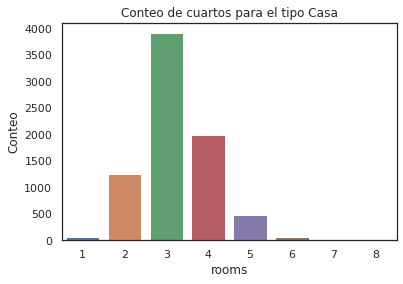

In [67]:
ax = sns.barplot(type_rooms.loc['h'].index, type_rooms.loc['h'])

ax.set_title('Conteo de cuartos para el tipo Casa')
ax.set(ylabel='Conteo')
ax.set_xticklabels(ax.get_xticklabels());

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


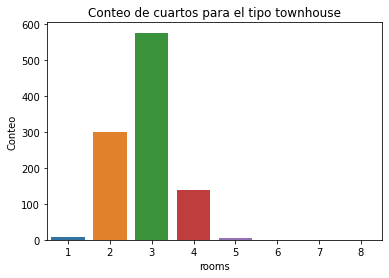

In [24]:
ax = sns.barplot(type_rooms.loc['t'].index, type_rooms.loc['t'])

ax.set_title('Conteo de cuartos para el tipo townhouse')
ax.set(ylabel='Conteo')
ax.set_xticklabels(ax.get_xticklabels());

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


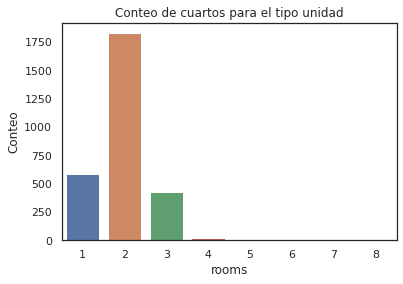

In [68]:
ax = sns.barplot(type_rooms.loc['u'].index, type_rooms.loc['u'])

ax.set_title('Conteo de cuartos para el tipo unidad')
ax.set(ylabel='Conteo')
ax.set_xticklabels(ax.get_xticklabels());

### b) Segmentando por región, tipo y número de cuartos

Ahora vamos a hacer una triple segmentación. Realiza los siguientes pasos:

1. Crea una tabla de contingencia donde el índice sea la variable 'region_name' y las columnas tengan un doble nivel con las variables 'type' y 'rooms'.
2. Usa el método `stack` para convertir el nivel de columnas 'type' en un segundo nivel para el índice.
3. Genera 4 gráficas donde compares las distribuciones de cantidad de cuartos para el tipo de propiedad 'h' ('house') en las regiones 'Eastern Metropolitan', 'Northern Metropolitan', 'Southern Metropolitan' y 'Western Metropolitan'. Tendrás que acceder a cada `Serie` usando una tupla para indicar los valores de los dos niveles del índice.
4. Anota tus gráficas adecuadamente.
5. Describe las similitudes y diferencias entre las 4 gráficas.

In [17]:
# Tu código va aquí
# 1. Crea una tabla de contingencia donde el índice sea la variable 'region_name' y las columnas tengan un doble nivel con las variables 'type' y 'rooms'.
regionname_type_rooms = pd.crosstab(df['region_name'], [df['type'], df['rooms']])
regionname_type_rooms

type                         h                                 t            \
rooms                        1    2     3    4    5   6  7  8  1    2    3   
region_name                                                                  
Eastern Metropolitan         4   83   396  292   77   8  1  2  0   23   60   
Eastern Victoria             0    2    13   17    1   0  0  0  0    0    0   
Northern Metropolitan       23  539  1237  449   76   6  2  0  6  134  139   
Northern Victoria            0    2    12    5    1   1  0  0  0    0    0   
South-Eastern Metropolitan   0    8   123   74   14   5  0  0  0    3   13   
Southern Metropolitan       14  366  1028  704  217  23  5  3  3   72  233   
Western Metropolitan        13  260  1090  443   89  11  1  1  0   67  130   
Western Victoria             0    1    13    7    0   0  0  0  0    0    0   

type                                 u                     
rooms                        4  5    1    2    3  4  6  8  
region_name                                                
Eastern Metropolitan        18  1    9   97   48  5  0  0  
Eastern Victoria             0  0    0    2    1  0  0  0  
Northern Metropolitan       10  1  196  499   98  2  0  1  
Northern Victoria            1  0    0    0    0  0  0  0  
South-Eastern Metropolitan   4  0    2   19    7  0  0  0  
Southern Metropolitan       78  0  311  968  192  7  0  0  
Western Metropolitan        27  2   64  243   83  3  1  0  
Western Victoria             0  0    0    1    0  0  0  0

In [16]:
# 2. Usa el método stack para convertir el nivel de columnas 'type' en un segundo nivel para el índice.
regionname_type_rooms_stacked = regionname_type_rooms.stack(level=0)
regionname_type_rooms_stacked

rooms                              1    2     3    4      5     6    7    8
region_name                type                                            
Eastern Metropolitan       h       4   83   396  292   77.0   8.0  1.0  2.0
                           t       0   23    60   18    1.0   NaN  NaN  NaN
                           u       9   97    48    5    NaN   0.0  NaN  0.0
Eastern Victoria           h       0    2    13   17    1.0   0.0  0.0  0.0
                           t       0    0     0    0    0.0   NaN  NaN  NaN
                           u       0    2     1    0    NaN   0.0  NaN  0.0
Northern Metropolitan      h      23  539  1237  449   76.0   6.0  2.0  0.0
                           t       6  134   139   10    1.0   NaN  NaN  NaN
                           u     196  499    98    2    NaN   0.0  NaN  1.0
Northern Victoria          h       0    2    12    5    1.0   1.0  0.0  0.0
                           t       0    0     0    1    0.0   NaN  NaN  NaN
                           u       0    0     0    0    NaN   0.0  NaN  0.0
South-Eastern Metropolitan h       0    8   123   74   14.0   5.0  0.0  0.0
                           t       0    3    13    4    0.0   NaN  NaN  NaN
                           u       2   19     7    0    NaN   0.0  NaN  0.0
Southern Metropolitan      h      14  366  1028  704  217.0  23.0  5.0  3.0
                           t       3   72   233   78    0.0   NaN  NaN  NaN
                           u     311  968   192    7    NaN   0.0  NaN  0.0
Western Metropolitan       h      13  260  1090  443   89.0  11.0  1.0  1.0
                           t       0   67   130   27    2.0   NaN  NaN  NaN
                           u      64  243    83    3    NaN   1.0  NaN  0.0
Western Victoria           h       0    1    13    7    0.0   0.0  0.0  0.0
                           t       0    0     0    0    0.0   NaN  NaN  NaN
                           u       0    1     0    0    NaN   0.0  NaN  0.0

Genera 4 gráficas donde compares las distribuciones de cantidad de cuartos para el tipo de propiedad 'h' ('house') en las regiones 'Eastern Metropolitan', 'Northern Metropolitan', 'Southern Metropolitan' y 'Western Metropolitan'. Tendrás que acceder a cada Serie usando una tupla para indicar los valores de los dos niveles del índice.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


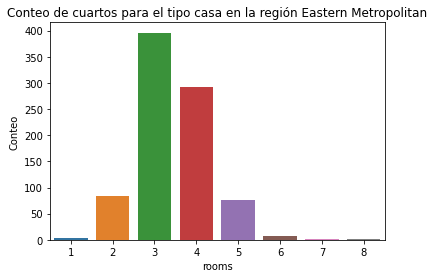

In [19]:
ax = sns.barplot(regionname_type_rooms_stacked.loc[('Eastern Metropolitan', 'h')].index,
            regionname_type_rooms_stacked.loc[('Eastern Metropolitan', 'h')])

ax.set_title('Conteo de cuartos para el tipo casa en la región Eastern Metropolitan')
ax.set(ylabel='Conteo')
ax.set_xticklabels(ax.get_xticklabels());

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


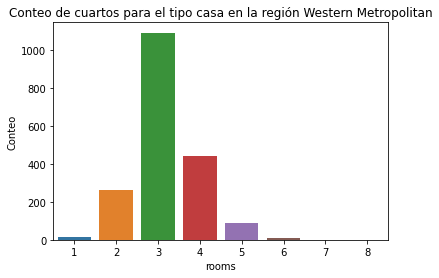

In [20]:
ax = sns.barplot(regionname_type_rooms_stacked.loc[('Western Metropolitan', 'h')].index,
            regionname_type_rooms_stacked.loc[('Western Metropolitan', 'h')])

ax.set_title('Conteo de cuartos para el tipo casa en la región Western Metropolitan')
ax.set(ylabel='Conteo')
ax.set_xticklabels(ax.get_xticklabels());

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


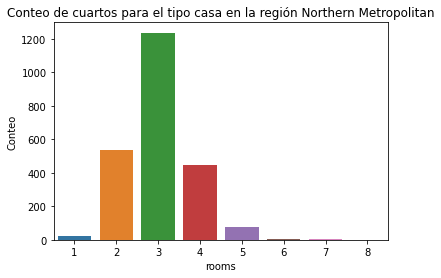

In [22]:
ax = sns.barplot(regionname_type_rooms_stacked.loc[('Northern Metropolitan', 'h')].index,
            regionname_type_rooms_stacked.loc[('Northern Metropolitan', 'h')])

ax.set_title('Conteo de cuartos para el tipo casa en la región Northern Metropolitan')
ax.set(ylabel='Conteo')
ax.set_xticklabels(ax.get_xticklabels());

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


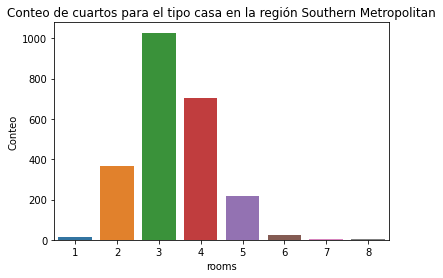

In [21]:
ax = sns.barplot(regionname_type_rooms_stacked.loc[('Southern Metropolitan', 'h')].index,
            regionname_type_rooms_stacked.loc[('Southern Metropolitan', 'h')])

ax.set_title('Conteo de cuartos para el tipo casa en la región Southern Metropolitan')
ax.set(ylabel='Conteo')
ax.set_xticklabels(ax.get_xticklabels());

***
***

<ins>Graficando en múltiples axis</ins>

Cuando tenemos tablas de contigencia, la única manera de poder visualizarlas en una gráfica es generando varias gráficas al mismo tiempo. Afortunadamente `matplotlib` hace de este proceso algo muy sencillo.

> 

[**`Ejemplo 4`**](Ejemplo-04/graficando_multiples_axis.ipynb)
[**`Reto 4`**](Reto-04/graficando_multiples_axis.ipynb)

---



## Ejemplo 4: Graficando con múltiples axis

### 1. Objetivos:
    - Aprender a generar varias gráficas al mismo tiempo para hacer comparaciones.
 
---
    
### 2. Desarrollo:

Tomemos la primera tabla de contingencia del Ejemplo pasado para graficarla:

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [48]:
df = pd.read_json('/content/drive/MyDrive/BEDU2023F3/Remoto_Datasets/Remoto zomato_reviews-clean.json')

df.head()

,has_online_delivery,price_range,currency,name,cuisines,location.address,location.city,user_rating
0,1,3,Rs.,Hauz Khas Social,"Continental, American, Asian, North Indian","9-A & 12, Hauz Khas Village, New Delhi",New Delhi,Very Good
1,0,3,Rs.,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...","C-7, Vishal Enclave, Opposite Metro Pillar 417...",New Delhi,Excellent
2,1,2,Rs.,The Hudson Cafe,"Cafe, Italian, Continental, Chinese","2524, 1st Floor, Hudson Lane, Delhi University...",New Delhi,Very Good
3,0,3,Rs.,Summer House Cafe,"Italian, Continental","1st Floor, DDA Shopping Complex, Aurobindo Pla...",New Delhi,Very Good
4,0,3,Rs.,38 Barracks,"North Indian, Italian, Asian, American","M-38, Outer Circle, Connaught Place, New Delhi",New Delhi,Very Good


In [ ]:
crosstab = pd.crosstab(df['price_range'], df['user_rating'])

crosstab

user_rating,Average,Excellent,Good,Not rated,Poor,Very Good
price_range,,,,,,
1,12,9,33,1,0,19
2,47,37,116,3,2,132
3,41,84,141,3,1,218
4,19,64,56,19,2,121


¿Recuerdas el objeto `figure`? Bueno, si `figure` es el objeto que contiene nuestras gráficas, los objetos `axes` son los encargados de dibujar cada una de las gráficas. `figure` contiene `axes` y nuestras gráficas se dibujan sobre los `axes`.

Usando el método `subplots`, podemos generar al mismo tiempo una nueva figura y múltiples `axes` que están contenidos en esa figura:

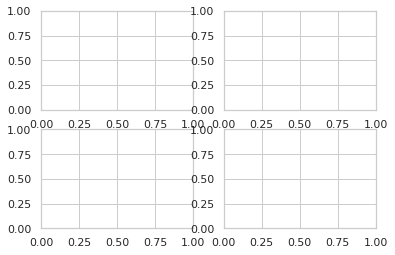

In [ ]:
fig, axes = plt.subplots(2, 2)

Le pasamos a `subplots` la estructura de nuestra 'tabla' de gráficas. En este caso, le indicamos un entramado de 2 x 2 porque tenemos 4 valores en el primer nivel.

Grafiquemos:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

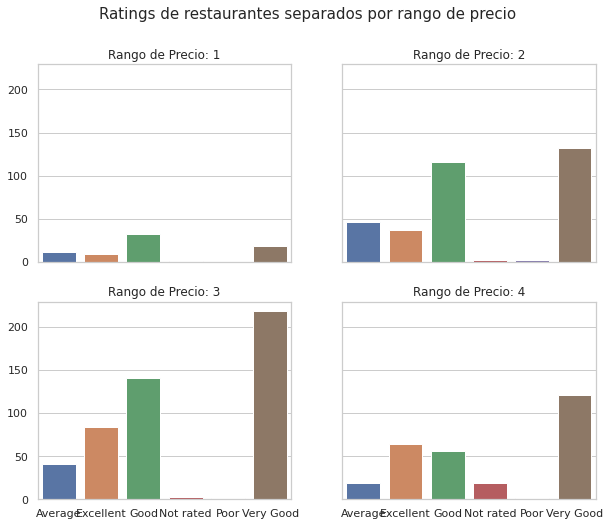

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

sns.barplot(crosstab.columns, crosstab.loc[1], ax=axes[0, 0])
sns.barplot(crosstab.columns, crosstab.loc[2], ax=axes[0, 1])
sns.barplot(crosstab.columns, crosstab.loc[3], ax=axes[1, 0])
sns.barplot(crosstab.columns, crosstab.loc[4], ax=axes[1, 1])

axes[0, 0].set(xlabel='', ylabel='', title='Rango de Precio: 1')
axes[0, 1].set(xlabel='', ylabel='', title='Rango de Precio: 2')
axes[1, 0].set(xlabel='', ylabel='', title='Rango de Precio: 3')
axes[1, 1].set(xlabel='', ylabel='', title='Rango de Precio: 4')

fig.suptitle('Ratings de restaurantes separados por rango de precio', fontsize=15);

Cosas importantes a notar:

1. Agregamos las banderas `sharex` y `sharey` porque tenemos el mismo eje x para todas nuestras gráficas y porque queremos comparar las gráficas una contra otra. Si nuestro eje y no fuera igual para todas, sería más difícil comparar usando sólo la vista.
2. La variable `axes` contiene un arreglo de dos dimensiones con cada uno de nuestros `ax` (el contenedor de cada gráfica). Así como accedemos a cualquier arreglo de 2 dimensiones, acceder a un `ax` se lleva a cabo de esta manera: `axes[0, 1]`.
3. Eliminamos los `xlabels` y los `ylabels` porque no son muy informativos y generan ruido visual. En cambio, cada gráfica necesita un título para saber a qué categoría del primer nivel pertenece.
4. Agregamos un título a la `figure` (en lugar de al `ax`) usando el método `suptitle`.

***

## Reto 4: Graficando múltiples axis

### 1. Objetivos:
    - Usar subplots para graficar múltiples gráficas de barras al mismo tiempo
 
---
    
### 2. Desarrollo:

En el Reto pasado generamos tablas de contingencia para segmentar nuestros datos usando dos o más variables categóricas. El problema con nuestras gráficas es que resultaba muy incómodo e ineficiente compararlas. Una manera mucho más efectiva de comparar varias gráficas es graficarlas en la misma figura. Tu Reto consiste en lo siguiente:

1. Lee el dataset 'melbourne_housing-clean.csv'.
2. Crea una tabla de contingencia donde el índice esté dado por la variable 'region_name' y las columnas por la variable 'type'. Esto nos va a dar una tabla donde tenemos la frecuencia de cada tipo de propiedad segmentada por regiones.
3. Genera una figura con 8 subplots para hacer gráficas de barras de cada región en nuestro dataset. Cada gráfica tendrá 3 barras, correspondiendo a los tipos 'h', 't' y 'u'.
4. Asegúrate de que compartan eje `x` y `y` para que sea fácil compararlas. Además agrega anotaciones y títulos donde creas necesario.
5. Describe tus hallazgos y comparte con tus compañeros qué podrían significar.

In [23]:
df = pd.read_csv('/content/drive/MyDrive/BEDU2023F3/Remoto_Datasets/Remoto melbourne_housing-clean.csv', index_col=0)
regionname_type = pd.crosstab(df['region_name'], [df['type']])
regionname_type

type,h,t,u
region_name,,,
Eastern Metropolitan,863,102,159
Eastern Victoria,33,0,3
Northern Metropolitan,2332,290,796
Northern Victoria,21,1,0
South-Eastern Metropolitan,224,20,28
Southern Metropolitan,2360,386,1478
Western Metropolitan,1908,226,394
Western Victoria,21,0,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

<AxesSubplot:xlabel='type', ylabel='Western Victoria'>

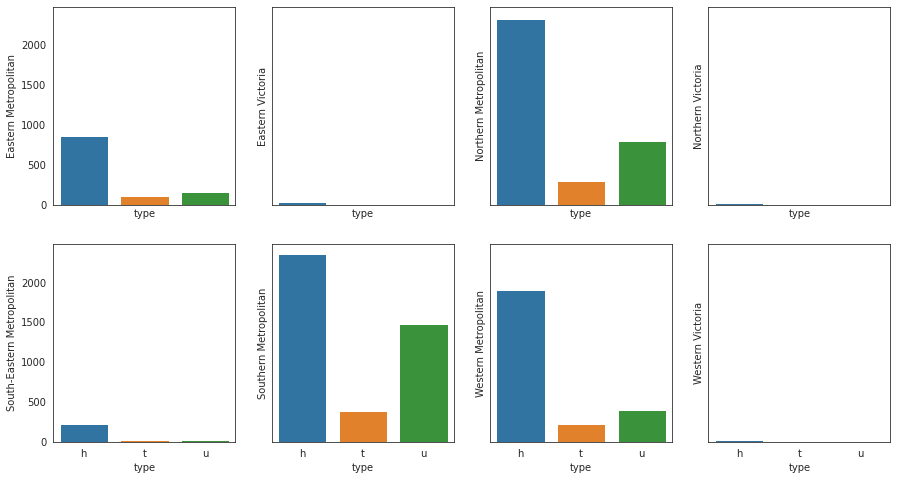

In [43]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8), sharex=True, sharey=True)

sns.barplot(regionname_type.loc['Eastern Metropolitan'].index, regionname_type.loc['Eastern Metropolitan'], ax=axes[0, 0])
sns.barplot(regionname_type.loc['Eastern Victoria'].index, regionname_type.loc['Eastern Victoria'], ax=axes[0, 1])
sns.barplot(regionname_type.loc['Northern Metropolitan'].index, regionname_type.loc['Northern Metropolitan'], ax=axes[0, 2])
sns.barplot(regionname_type.loc['Northern Victoria'].index, regionname_type.loc['Northern Victoria'], ax=axes[0, 3])
sns.barplot(regionname_type.loc['South-Eastern Metropolitan'].index, regionname_type.loc['South-Eastern Metropolitan'], ax=axes[1, 0])
sns.barplot(regionname_type.loc['Southern Metropolitan'].index, regionname_type.loc['Southern Metropolitan'], ax=axes[1, 1])
sns.barplot(regionname_type.loc['Western Metropolitan'].index, regionname_type.loc['Western Metropolitan'], ax=axes[1, 2])
sns.barplot(regionname_type.loc['Western Victoria'].index, regionname_type.loc['Western Victoria'], ax=axes[1, 3])

***
***

<ins>Boxplots y Violinplots</ins>

Las tablas de contingencia son muy útiles cuando queremos hacer conteo de frecuencias utilizando dos o más categorías para agrupar nuestros datos. En cambio los boxplots y violinplots resultan ser muy útiles cuando queremos analizar la distribución de una variable numérica después de haber sido agrupada utilizando una variable categórica.

> 

[**`Ejemplo 5`**](Ejemplo-05/boxplots_y_violinplots.ipynb)
[**`Reto 5`**](Reto-05/boxplots_y_violinplots.ipynb)

---


## Ejemplo 5: Boxplots y Violinplots

### 1. Objetivos:
    - Aprender a generar boxplots y violinplots para analizar distribuciones de valores numéricos agrupados usando una variable categórica.
 
---
    
### 2. Desarrollo:

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [50]:
df = pd.read_csv('/content/drive/MyDrive/BEDU2023F3/Remoto_Datasets/Remoto athlete_olympic_events-clean.csv', index_col=0)

df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


In [51]:
by_athlete = df.groupby(level=0)[['age', 'height', 'weight']].mean()
sex = df.groupby(level=0)['sex'].last()
merged = by_athlete.merge(sex, left_index=True, right_index=True)

In [ ]:
merged

,age,height,weight,sex
athlete_id,,,,
1,24.000000,180.0,80.0,M
2,23.000000,170.0,60.0,M
5,24.333333,185.0,82.0,F
6,32.000000,188.0,75.0,M
7,32.000000,183.0,72.0,M
...,...,...,...,...
135567,26.000000,183.0,72.0,M
135568,33.000000,171.0,69.0,F
135569,29.000000,179.0,89.0,M


La tabla `merged` tiene 3 variables numéricas y 1 variable categórica. Ya hemos visto cómo podemos analizar la distribución de una variable numérica utilizando boxplots:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight'>

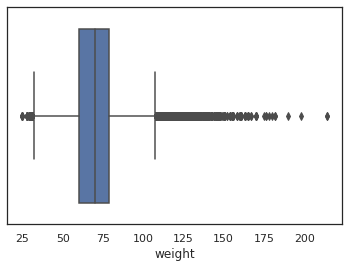

In [52]:
sns.boxplot(df['weight'])

Pero dado que tenemos una variable categórica (en este caso binaria, pues tiene solo dos valores posibles), podemos utilizar dos boxplots paralelos para analizar la distribución de esta misma variable numérica después de ser agrupada utilizando la variable categórica:

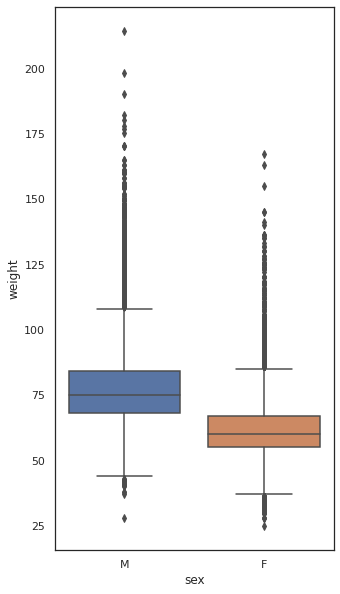

In [54]:
plt.figure(figsize=(5, 10))
sns.boxplot(data=merged, x='sex', y='weight');

También podemos explorar las distribuciones usando un violinplot. Un violinplot es muy parecido a un boxplot, pero la diferencia es que en vez de graficar frecuencias grafica estimados de densidad. ¿Recuerdas las gráficas de densidad que utilizamos para hacer los histogramas más 'suaves' y poder comparar dos histogramas al mismo tiempo? Bueno, un violinplot es básicamente un boxplot mezclado con una gráfica de densidad.

En un violinplot es mucho más fácil ver ciertos detalles en la distribución de los datos que no es posible ver en los boxplots (ya que un boxplot no tiene mucha flexibilidad en cuanto a figuras se refiere). En cambio, en un violinplot es mucho más difícil ver los valores atípicos y dónde se encuentran ubicados.

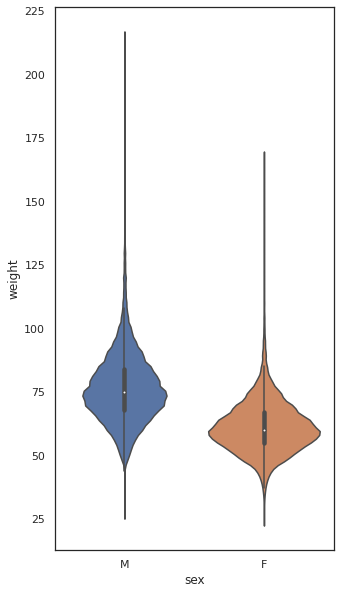

In [ ]:
plt.figure(figsize=(5, 10))
sns.violinplot(data=merged, x='sex', y='weight');

La 'pildorita' negra en medio del violinplot representa el Rango Intercuartílico y el punto blanco la mediana. Así puedes comparar más fácilmente lo que estamos viendo en esta gráfica con la gráfica anterior.

***

## Reto 5: Boxplots y violinplots

### 1. Objetivos:
    - Comparar distribuciones de variables numéricas segmentadas por variables categóricas usando boxplots y violinplots
 
---
    
### 2. Desarrollo:

Vamos a seguir analizando nuestro dataset 'melbourne_housing-clean.csv', esta vez viéndolo desde aún otra perspectiva más. Vamos a generar boxplots y violinplots de la distribución de los precios de las propiedad segmentándolos por tipo de propiedad antes. Tu reto consiste en lo siguiente:

1. Lee el dataset 'melbourne_housing-clean.csv'.
2. Crea un boxplot donde el eje x sea la variable 'type' y el eje y sea la variable 'price'.
3. Agrega títulos y anotaciones que creas convenientes. Modifica el tamaño si lo crees necesario.
4. Crea un violinplot donde el eje x sea la variable 'type' y el eje y sea la variable 'price'.
5. Agrega títulos y anotaciones que creas convenientes. Modifica el tamaño si lo crees necesario.
6. Compara ambas gráficas y comenta con tus compañeros y la experta si creen que nos dan información distinta o no.

In [38]:
df = pd.read_csv('/content/drive/MyDrive/BEDU2023F3/Remoto_Datasets/Remoto melbourne_housing-clean.csv', index_col=0)
df.head()

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


<AxesSubplot:xlabel='type', ylabel='price'>

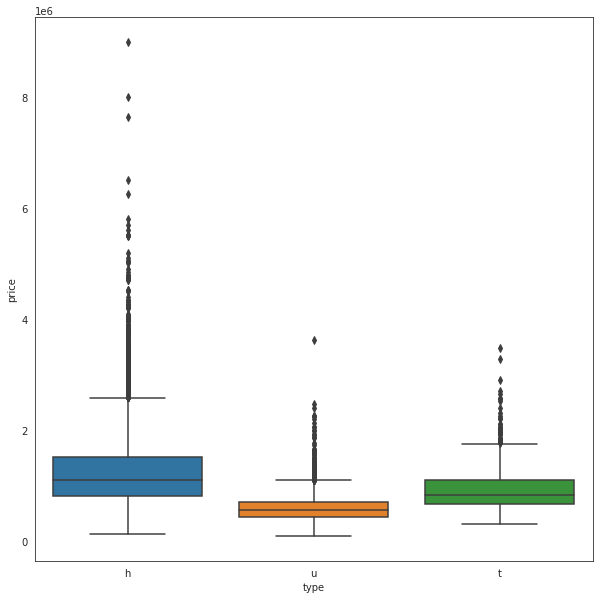

In [39]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x='type', y='price')

<AxesSubplot:xlabel='type', ylabel='price'>

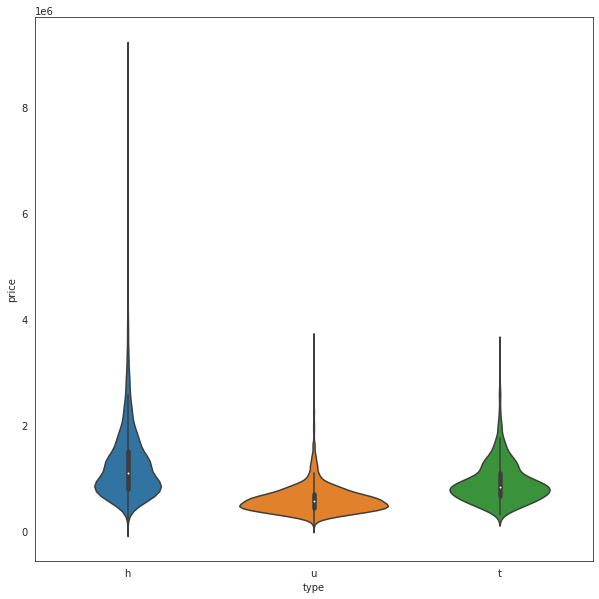

In [40]:
plt.figure(figsize=(10, 10))
sns.violinplot(data=df, x='type', y='price')

***
***
***

# **Retos** (otras formas de solución)
----

# Reto 1: Anotando gráficas

## 1. Objetivos:
- Aprender a hacer gráficas más claras añadiendo anotaciones y cambiando el tamaño
 
---
    
## 2. Desarrollo:

A continuación verás algunas gráficas que han sido realizadas de antemano. Tu Reto es añadir títulos, nombres de ejes, leyendas, etc. para que estas gráficas sean más comprensibles. En el caso de que sea necesario, aumenta también el tamaño de la gráfica

Para que puedas echarle un vistazo al tema de este dataset, [visita este link](https://www.kaggle.com/uciml/pima-indians-diabetes-database). Es importante saber de qué hablamos para saber anotar correctamente nuestras gráficas.

[Link al artículo](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/pdf/procascamc00018-0276.pdf)

Entonces:

1. Aumenta de tamaño la gráfica si consideras que sería más comprensible de esa manera
2. Donde sea adecuado, añade títulos, nombres de ejes y leyendas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/manu-msr/beduadp/master/Datasets/diabetes-clean.csv', index_col=0)

df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### a)

Text(0.5, 0, 'mmol/L (milimoles por litro)')

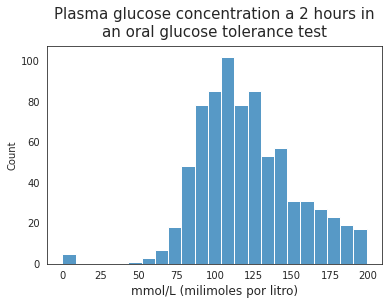

In [3]:
ax = sns.histplot(df['glucose'])
ax.set_title("Plasma glucose concentration a 2 hours in\nan oral glucose tolerance test",
             fontsize = 15,
             pad = 10)
ax.set_xlabel("mmol/L (milimoles por litro)", size = 12)

### b)

Text(0.5, 0, 'Número de veces que la paciente se embarazó')

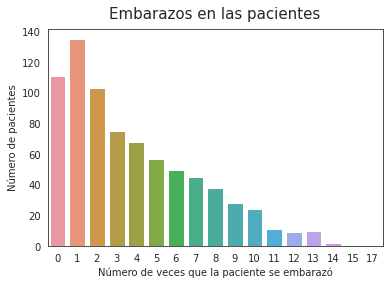

In [4]:
pregnancy_counts = df['pregnancies'].value_counts()
ax = sns.barplot(x=pregnancy_counts.index, y=pregnancy_counts)
ax.set_title("Embarazos en las pacientes",
             fontsize = 15,
             pad = 10)
ax.set_ylabel("Número de pacientes",
              size = 10
              )
ax.set_xlabel("Número de veces que la paciente se embarazó")

### c)

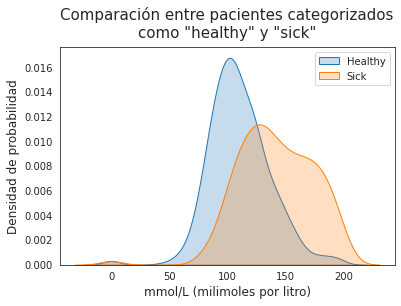

In [5]:
healthy = df[df['outcome'] == 0]
sick = df[df['outcome'] == 1]
ax = sns.kdeplot(healthy['glucose'], shade=True, label = 'Healthy')
ax = sns.kdeplot(sick['glucose'], shade=True, label = 'Sick')
ax.set_title('Comparación entre pacientes categorizados\ncomo "healthy" y "sick"',
             fontsize = 15,
             pad = 10
             )
ax.set_ylabel('Densidad de probabilidad',
              size = 12
              )
ax.set_xlabel('mmol/L (milimoles por litro)',
              size = 12
              )
ax.legend(loc=0)

### d)

Separar en 3 gráficas diferentes ya que no comparten mismas unidades

<AxesSubplot:xlabel='blood_pressure', ylabel='Density'>

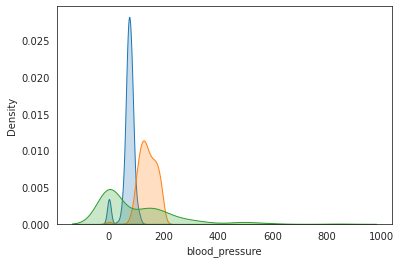

In [6]:
sns.kdeplot(sick['blood_pressure'], shade=True)
sns.kdeplot(sick['glucose'], shade=True)
sns.kdeplot(sick['insulin'], shade=True)

-----

# Reto 2: Gráficas de barras

## 1. Objetivos:
- Aprender a hacer gráficas de barras de distintos tipos
 
---
    
## 2. Desarrollo:

Para este ejercicio vamos a utilizar el dataset 'melbourne_housing-clean.csv'. La fuente original [está aquí](https://www.kaggle.com/anthonypino/melbourne-housing-market), en caso de que quieras recordar de qué trata.

Vamos a realizar 3 gráficas de barras utilizando este dataset. Las instrucciones para cada una son las siguientes:

1. Gráfica de barras *verticales* usando la columna `rooms`. El eje y será el *conteo de frecuencia* de cada categoría. Las barras tienen que quedar *ordenadas en orden descendente* (es decir, de la más larga a la màs corta). Para lograr ordenarlas, tendrás que revisar [la documentación](https://seaborn.pydata.org/generated/seaborn.barplot.html) de la gráfica de barras de Seaborn.

2. Gráfica de barras *verticales* de la columna `types`. El eje y será el *porcentaje de frecuencia* de cada categoría.

3. Gráfica de barras *h*orizontales* de la columna `council_area`. El eje x será el *conteo de frecuencia* de cada categoría.

**Todas** las gráficas deberán de tener títulos y nombres adecuados para los ejes. También deberán de tener el tamaño correcto para que la visualización sea comprensible.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/jaeem006/beduadp/master/Datasets/melbourne_housing-clean.csv", index_col=0)
df.sample(3)

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
5515,Seddon,32 Walter St,4,h,970000.0,VB,Jas,23/04/2016,6.6,3011.0,2.0,2.0,1.0,149.0,Maribyrnong,-37.8047,144.8948,Western Metropolitan,2417.0
3659,Kew,2/78 Studley Park Rd,3,u,955000.0,S,Marshall,25/02/2017,5.6,3101.0,3.0,2.0,2.0,140.0,Boroondara,-37.8063,145.0179,Southern Metropolitan,10331.0
3919,Maribyrnong,44 Blair St,2,t,410000.0,S,Biggin,10/09/2016,8.7,3032.0,2.0,1.0,2.0,53.0,Maribyrnong,-37.7736,144.8798,Western Metropolitan,4918.0


In [ ]:
df['rooms'].value_counts(ascending=False).index

Int64Index([3, 2, 4, 1, 5, 6, 7, 8], dtype='int64')

Text(0.5, 0, 'Número de habitaciones')

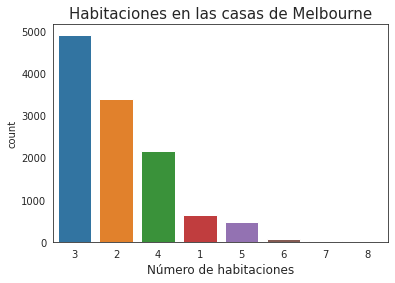

In [9]:
# Grafica de barras verticales usando `rooms`
ax = sns.countplot(data=df,
              x='rooms',
              order = df['rooms'].value_counts().index.to_list())
ax.set_title("Habitaciones en las casas de Melbourne", fontsize = 15)
ax.set_xlabel("Número de habitaciones", size = 12)
#sns.despine()
#
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

In [12]:
df['type']\
.apply(lambda x: dict(h='house', u='unit-duplex',t='townhouse')[x])\
.value_counts(normalize = True) * 100

house          66.649493
unit-duplex    24.549201
townhouse       8.801305
Name: type, dtype: float64

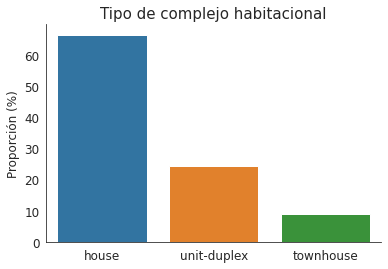

In [13]:
# Grafica de barras verticales
perc_type = df['type']\
            .apply(lambda x: dict(h='house', u='unit-duplex',t='townhouse')[x])\
            .value_counts(normalize=True) * 100
ax = sns.barplot(x = perc_type.index, y = perc_type)
ax.set_title("Tipo de complejo habitacional", fontsize = 15)
ax.set_ylabel("Proporción (%)", size = 12)
ax.tick_params(axis = 'both', labelsize = 12)
sns.despine()

In [14]:
df['council_area'].value_counts()

Moreland             1129
Boroondara           1128
Moonee Valley         961
Darebin               895
Glen Eira             831
Stonnington           710
Maribyrnong           675
Yarra                 644
Port Phillip          622
Banyule               557
Bayside               473
Melbourne             463
Hobsons Bay           418
Brimbank              392
Monash                313
Manningham            300
Whitehorse            290
Kingston              177
Hume                  128
Whittlesea            122
Wyndham                68
Knox                   65
Maroondah              62
Melton                 49
Greater Dandenong      47
Frankston              39
Casey                  31
Nillumbik              26
Yarra Ranges           16
Macedon Ranges          6
Cardinia                6
Moorabool               2
Mitchell                1
Name: council_area, dtype: int64

<AxesSubplot:xlabel='council_area'>

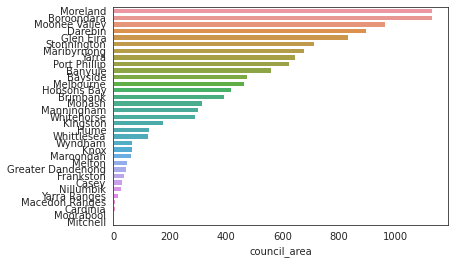

In [15]:
# Grafica de barras horizontales de `council_area`
ax = sns.barplot(y = df['council_area'].value_counts().index,
                 x = df['council_area'].value_counts())
ax

-----

## Reto 3: Tablas de contingencia

### 1. Objetivos:
    - Aprender a generar tablas de contingencia utilizando múltiples variables categóricas.
 
---
    
### 2. Desarrollo:

En este Reto vamos a volver a utilizar el dataset 'melbourne_housing-clean.csv'. Nuestro objetivo será segmentar nuestros datos usando 2 y 3 variables categóricas y luego realizar algunas visualizaciones.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/jaeem006/beduadp/master/Datasets/melbourne_housing-clean.csv", index_col=0)
df.sample(3)

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
805,Bentleigh East,49 Gowrie St,4,h,1137500.0,S,Woodards,4/06/2016,13.9,3165.0,4.0,1.0,2.0,696.0,Glen Eira,-37.9157,145.0802,Southern Metropolitan,10969.0
7418,Keilor Park,44 Erebus St,4,t,746000.0,S,Barry,22/05/2016,14.5,3042.0,4.0,3.0,1.0,308.0,Brimbank,-37.7231,144.8602,Western Metropolitan,1119.0
4195,Moorabbin,24a Franklin St,3,t,800000.0,S,Buxton,28/08/2016,14.6,3189.0,3.0,2.0,1.0,0.0,Kingston,-37.9374,145.0542,Southern Metropolitan,2555.0


### a) Segmentando por tipo y número de cuartos

La primera parte consiste en lo siguiente:

1. Crea una tabla de contingencia usando como índice la variable 'type' y para las columnas la variable 'rooms'.
2. Crea una gráfica de barras para cada uno de los índices ('h', 't', 'u') donde el eje x sean las columnas de la tabla de contingencia.
3. Agrega los títulos y anotaciones necesarias.
4. Describe las similitudes y las diferencias de las distribuciones de las 3 gráficas.

In [2]:
# 0. Cambiamos de codigos a nombres
df['type'] = df['type']\
             .apply(lambda x: dict(h='house', u='unit-duplex',t='townhouse')[x])

# 1. Crear una tabla de contigencia
df_type_rooms = pd.crosstab(df['type'], df['rooms'])
df_type_rooms

rooms,1,2,3,4,5,6,7,8
type,,,,,,,,
house,54,1261,3912,1991,475,54,9,6
townhouse,9,299,575,138,4,0,0,0
unit-duplex,582,1829,429,17,0,1,0,1


In [3]:
df_type_rooms.loc['house']

rooms
1      54
2    1261
3    3912
4    1991
5     475
6      54
7       9
8       6
Name: house, dtype: int64

Text(0.5, 1.0, "Numero de habitaciones en viviendas del tipo 'house'")

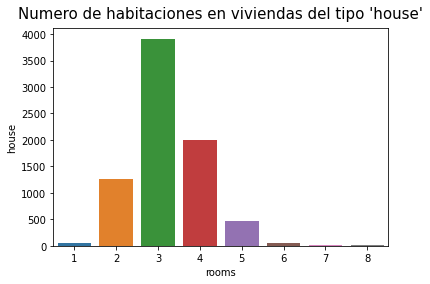

In [4]:
# 2.1 Crear una gráfica de barras
ax = sns.barplot(x = df_type_rooms.loc['house'].index,
                 y = df_type_rooms.loc['house'])
ax.set_title("Numero de habitaciones en viviendas del tipo 'house'", fontsize = 15, pad = 10)

Text(0.5, 1.0, "Numero de habitaciones en viviendas del tipo 'townhouse'")

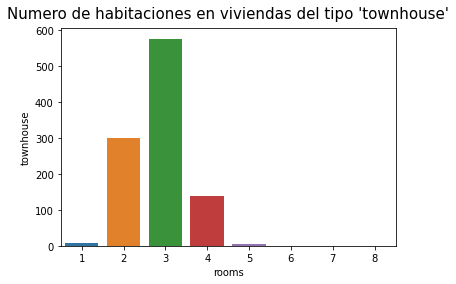

In [5]:
# 2.2 Crear una gráfica de barras
ax = sns.barplot(x = df_type_rooms.loc['townhouse'].index,
                 y = df_type_rooms.loc['townhouse'])
ax.set_title("Numero de habitaciones en viviendas del tipo 'townhouse'", fontsize = 15, pad = 10)

Text(0.5, 1.0, "Numero de habitaciones en viviendas del tipo 'unit-duplex'")

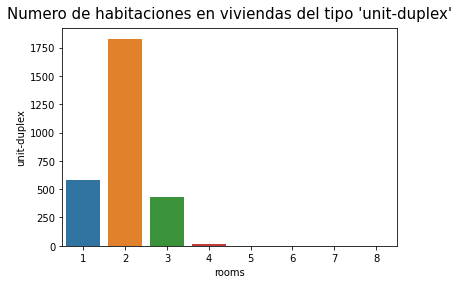

In [6]:
# 2.3 Crear una gráfica de barras
ax = sns.barplot(x = df_type_rooms.loc['unit-duplex'].index,
                 y = df_type_rooms.loc['unit-duplex'])
ax.set_title("Numero de habitaciones en viviendas del tipo 'unit-duplex'", fontsize = 15, pad = 10)

### b) Segmentando por región, tipo y número de cuartos

Ahora vamos a hacer una triple segmentación. Realiza los siguientes pasos:

1. Crea una tabla de contingencia donde el índice sea la variable 'region_name' y las columnas tengan un doble nivel con las variables 'type' y 'rooms'.
2. Usa el método `stack` para convertir el nivel de columnas 'type' en un segundo nivel para el índice.
3. Genera 4 gráficas donde compares las distribuciones de cantidad de cuartos para el tipo de propiedad 'h' ('house') en las regiones 'Eastern Metropolitan', 'Northern Metropolitan', 'Southern Metropolitan' y 'Western Metropolitan'. Tendrás que acceder a cada `Serie` usando una tupla para indicar los valores de los dos niveles del índice.
4. Anota tus gráficas adecuadamente.
5. Describe las similitudes y diferencias entre las 4 gráficas.

In [7]:
# 1. Crear crosstab con tres variables
df_region_name_type_rooms = pd.crosstab(df['region_name'], [df['type'], df['rooms']])
df_region_name_type_rooms

type                       house                                townhouse  \
rooms                          1    2     3    4    5   6  7  8         1   
region_name                                                                 
Eastern Metropolitan           4   83   396  292   77   8  1  2         0   
Eastern Victoria               0    2    13   17    1   0  0  0         0   
Northern Metropolitan         23  539  1237  449   76   6  2  0         6   
Northern Victoria              0    2    12    5    1   1  0  0         0   
South-Eastern Metropolitan     0    8   123   74   14   5  0  0         0   
Southern Metropolitan         14  366  1028  704  217  23  5  3         3   
Western Metropolitan          13  260  1090  443   89  11  1  1         0   
Western Victoria               0    1    13    7    0   0  0  0         0   

type                                        unit-duplex                     
rooms                         2    3   4  5           1    2    3  4  6  8  
region_name                                                                 
Eastern Metropolitan         23   60  18  1           9   97   48  5  0  0  
Eastern Victoria              0    0   0  0           0    2    1  0  0  0  
Northern Metropolitan       134  139  10  1         196  499   98  2  0  1  
Northern Victoria             0    0   1  0           0    0    0  0  0  0  
South-Eastern Metropolitan    3   13   4  0           2   19    7  0  0  0  
Southern Metropolitan        72  233  78  0         311  968  192  7  0  0  
Western Metropolitan         67  130  27  2          64  243   83  3  1  0  
Western Victoria              0    0   0  0           0    1    0  0  0  0

In [8]:
# 2. Usar el metodo stack para convertie el nivel de columnas `type` en segundo nivel para el indice
df_region_name_type_rooms_stacked = df_region_name_type_rooms.stack(level=0)
df_region_name_type_rooms_stacked

rooms                                     1    2     3    4      5     6    7  \
region_name                type                                                 
Eastern Metropolitan       house          4   83   396  292   77.0   8.0  1.0   
                           townhouse      0   23    60   18    1.0   NaN  NaN   
                           unit-duplex    9   97    48    5    NaN   0.0  NaN   
Eastern Victoria           house          0    2    13   17    1.0   0.0  0.0   
                           townhouse      0    0     0    0    0.0   NaN  NaN   
                           unit-duplex    0    2     1    0    NaN   0.0  NaN   
Northern Metropolitan      house         23  539  1237  449   76.0   6.0  2.0   
                           townhouse      6  134   139   10    1.0   NaN  NaN   
                           unit-duplex  196  499    98    2    NaN   0.0  NaN   
Northern Victoria          house          0    2    12    5    1.0   1.0  0.0   
                           townhouse      0    0     0    1    0.0   NaN  NaN   
                           unit-duplex    0    0     0    0    NaN   0.0  NaN   
South-Eastern Metropolitan house          0    8   123   74   14.0   5.0  0.0   
                           townhouse      0    3    13    4    0.0   NaN  NaN   
                           unit-duplex    2   19     7    0    NaN   0.0  NaN   
Southern Metropolitan      house         14  366  1028  704  217.0  23.0  5.0   
                           townhouse      3   72   233   78    0.0   NaN  NaN   
                           unit-duplex  311  968   192    7    NaN   0.0  NaN   
Western Metropolitan       house         13  260  1090  443   89.0  11.0  1.0   
                           townhouse      0   67   130   27    2.0   NaN  NaN   
                           unit-duplex   64  243    83    3    NaN   1.0  NaN   
Western Victoria           house          0    1    13    7    0.0   0.0  0.0   
                           townhouse      0    0     0    0    0.0   NaN  NaN   
                           unit-duplex    0    1     0    0    NaN   0.0  NaN   

rooms                                     8  
region_name                type              
Eastern Metropolitan       house        2.0  
                           townhouse    NaN  
                           unit-duplex  0.0  
Eastern Victoria           house        0.0  
                           townhouse    NaN  
                           unit-duplex  0.0  
Northern Metropolitan      house        0.0  
                           townhouse    NaN  
                           unit-duplex  1.0  
Northern Victoria          house        0.0  
                           townhouse    NaN  
                           unit-duplex  0.0  
South-Eastern Metropolitan house        0.0  
                           townhouse    NaN  
                           unit-duplex  0.0  
Southern Metropolitan      house        3.0  
                           townhouse    NaN  
                           unit-duplex  0.0  
Western Metropolitan       house        1.0  
                           townhouse    NaN  
                           unit-duplex  0.0  
Western Victoria           house        0.0  
                           townhouse    NaN  
                           unit-duplex  0.0

In [9]:
df_region_name_type_rooms_stacked.loc[('Eastern Metropolitan','house'),:]

rooms
1      4.0
2     83.0
3    396.0
4    292.0
5     77.0
6      8.0
7      1.0
8      2.0
Name: (Eastern Metropolitan, house), dtype: float64

Text(0, 0.5, 'Frecuencia')

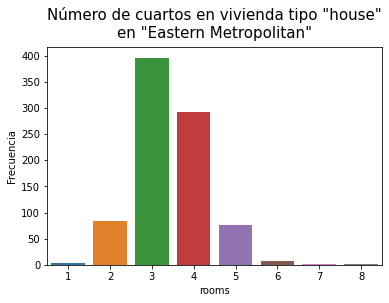

In [10]:
# 4.1 Crear gráficas de barras para el caso de 'house' en Eastern Metropolitan
ax = sns.barplot(x = df_region_name_type_rooms_stacked\
            .loc[('Eastern Metropolitan', 'house')]\
            .index,
            y = df_region_name_type_rooms_stacked\
            .loc[('Eastern Metropolitan', 'house')]
            )
ax.set_title('Número de cuartos en vivienda tipo "house"\nen "Eastern Metropolitan"',fontsize = 15, pad = 10)
ax.set_ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

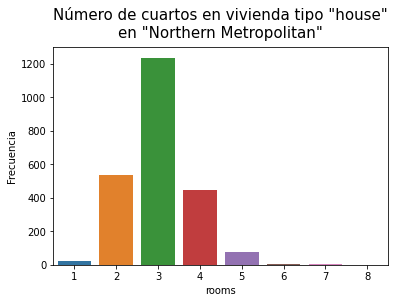

In [11]:
# 4.2 Crear gráficas de barras para el caso de 'house' en Northern Metropolitan
ax = sns.barplot(x = df_region_name_type_rooms_stacked\
            .loc['Northern Metropolitan', 'house']\
            .index,
            y = df_region_name_type_rooms_stacked\
            .loc['Northern Metropolitan', 'house']
            )
ax.set_title('Número de cuartos en vivienda tipo "house"\nen "Northern Metropolitan"',fontsize = 15, pad = 10)
ax.set_ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

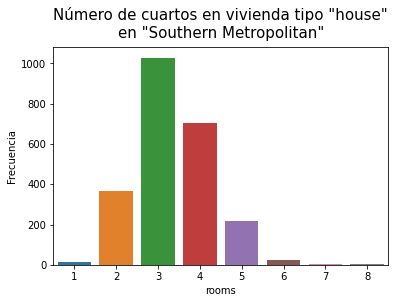

In [12]:
# 4.3 Crear gráficas de barras para el caso de 'house' en Southern Metropolitan
ax = sns.barplot(x = df_region_name_type_rooms_stacked\
            .loc['Southern Metropolitan', 'house']\
            .index,
            y = df_region_name_type_rooms_stacked\
            .loc['Southern Metropolitan', 'house']
            )
ax.set_title('Número de cuartos en vivienda tipo "house"\nen "Southern Metropolitan"',fontsize = 15, pad = 10)
ax.set_ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

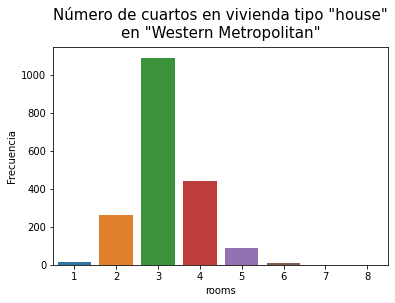

In [13]:
# 4.4 Crear gráficas de barras para el caso de 'house' en Western Metropolitan
ax = sns.barplot(x = df_region_name_type_rooms_stacked\
            .loc['Western Metropolitan', 'house']\
            .index,
            y = df_region_name_type_rooms_stacked\
            .loc['Western Metropolitan', 'house']
            )
ax.set_title('Número de cuartos en vivienda tipo "house"\nen "Western Metropolitan"',fontsize = 15, pad = 10)
ax.set_ylabel("Frecuencia")

-----

## Reto 4: Graficando múltiples axis

### 1. Objetivos:
    - Usar subplots para graficar múltiples gráficas de barras al mismo tiempo
 
---
    
### 2. Desarrollo:

En el Reto pasado generamos tablas de contingencia para segmentar nuestros datos usando dos o más variables categóricas. El problema con nuestras gráficas es que resultaba muy incómodo e ineficiente compararlas. Una manera mucho más efectiva de comparar varias gráficas es graficarlas en la misma figura. Tu Reto consiste en lo siguiente:

1. Lee el dataset 'melbourne_housing-clean.csv'.
2. Crea una tabla de contingencia donde el índice esté dado por la variable 'region_name' y las columnas por la variable 'type'. Esto nos va a dar una tabla donde tenemos la frecuencia de cada tipo de propiedad segmentada por regiones.
3. Genera una figura con 8 subplots para hacer gráficas de barras de cada región en nuestro dataset. Cada gráfica tendrá 3 barras, correspondiendo a los tipos 'h', 't' y 'u'.
4. Asegúrate de que compartan eje `x` y `y` para que sea fácil compararlas. Además agrega anotaciones y títulos donde creas necesario.
5. Describe tus hallazgos y comparte con tus compañeros qué podrían significar.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/jaeem006/beduadp/master/Datasets/melbourne_housing-clean.csv", index_col = 0)
df.sample(3)

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
7544,Box Hill,11 Howard St,3,h,2080000.0,S,Buxton,22/04/2017,13.1,3128.0,3.0,2.0,2.0,693.0,Whitehorse,-37.82290,145.12170,Eastern Metropolitan,4605.0
1760,Carnegie,1/3 Coorigil Rd,3,h,1360000.0,S,Woodards,19/11/2016,11.4,3163.0,3.0,2.0,2.0,282.0,Glen Eira,-37.89530,145.05670,Southern Metropolitan,7822.0
10341,Hoppers Crossing,138 Bellbridge Dr,3,h,520000.0,SP,Barry,27/05/2017,18.4,3029.0,3.0,2.0,2.0,530.0,Wyndham,-37.86713,144.71086,Western Metropolitan,13830.0


In [15]:
# 0. Cambiamos de codigos a nombres
df['type'] = df['type']\
             .apply(lambda x: dict(h='house', u='unit-duplex',t='townhouse')[x])

# 1. Crear una tabla de contigencia
df_region_name_rooms = pd.crosstab(df['region_name'], df['type'])
df_region_name_rooms

type,house,townhouse,unit-duplex
region_name,,,
Eastern Metropolitan,863,102,159
Eastern Victoria,33,0,3
Northern Metropolitan,2332,290,796
Northern Victoria,21,1,0
South-Eastern Metropolitan,224,20,28
Southern Metropolitan,2360,386,1478
Western Metropolitan,1908,226,394
Western Victoria,21,0,1


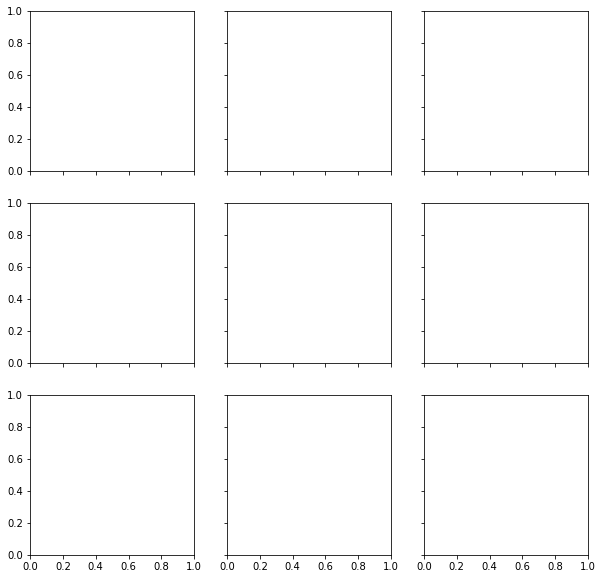

In [16]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize = (10,10),sharex=True, sharey=True)

Text(0.5, 0.935, 'Número de tipos de casas por region')

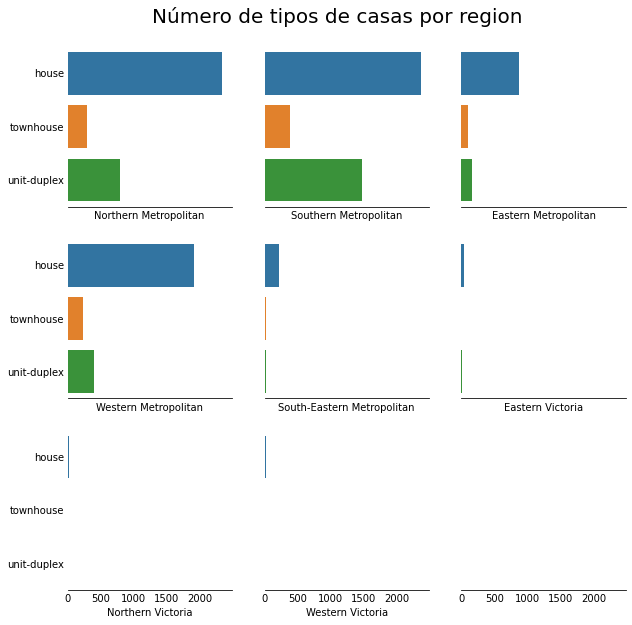

In [17]:
# 3. y 4. Generar subplots que compartan eje x y eje y
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows=3, ncols=3,
                                                                  figsize = (10,10),
                                                                  sharex=True, sharey=True)
#fig.subplots_adjust(wspace=0.9)

sns.barplot(y = df_region_name_rooms.loc['Northern Metropolitan'].index,
            x = df_region_name_rooms.loc['Northern Metropolitan'],
            ax=ax1)
sns.barplot(y = df_region_name_rooms.loc['Southern Metropolitan'].index,
            x = df_region_name_rooms.loc['Southern Metropolitan'],
            ax=ax2)
sns.barplot(y = df_region_name_rooms.loc['Eastern Metropolitan'].index,
            x = df_region_name_rooms.loc['Eastern Metropolitan'],
            ax=ax3)
sns.barplot(y = df_region_name_rooms.loc['Western Metropolitan'].index,
            x = df_region_name_rooms.loc['Western Metropolitan'],
            ax=ax4)
sns.barplot(y = df_region_name_rooms.loc['South-Eastern Metropolitan'].index,
            x = df_region_name_rooms.loc['South-Eastern Metropolitan'],
            ax=ax5)
sns.barplot(y = df_region_name_rooms.loc['Eastern Victoria'].index,
            x = df_region_name_rooms.loc['Eastern Victoria'],
            ax=ax6)
sns.barplot(y = df_region_name_rooms.loc['Northern Victoria'].index,
            x = df_region_name_rooms.loc['Northern Victoria'],
            ax=ax7)
sns.barplot(y = df_region_name_rooms.loc['Western Victoria'].index,
            x = df_region_name_rooms.loc['Western Victoria'],
            ax=ax8)

ax1.tick_params(length = 0)
ax2.tick_params(length = 0)
ax3.tick_params(length = 0)
ax4.tick_params(length = 0)
ax5.tick_params(length = 0)
ax6.tick_params(length = 0)
ax7.tick_params(length = 0)
ax8.tick_params(length = 0)
ax9.tick_params(length = 0)

sns.despine(left=True, right=True, top=True, bottom=False)

ax1.set_ylabel(None)
ax2.set_ylabel(None)
ax3.set_ylabel(None)
ax4.set_ylabel(None)
ax5.set_ylabel(None)
ax6.set_ylabel(None)
ax7.set_ylabel(None)
ax8.set_ylabel(None)
ax9.set_ylabel(None)


fig.suptitle("Número de tipos de casas por region", y = 0.935, fontsize = 20)

-----

# Reto 5: Boxplots y violinplots

## 1. Objetivos:
- Comparar distribuciones de variables numéricas segmentadas por variables categóricas usando boxplots y violinplots
 
---
    
## 2. Desarrollo:

Vamos a seguir analizando nuestro dataset 'melbourne_housing-clean.csv', esta vez viéndolo desde aún otra perspectiva más. Vamos a generar boxplots y violinplots de la distribución de los precios de las propiedad segmentándolos por tipo de propiedad antes. Tu reto consiste en lo siguiente:

1. Lee el dataset 'melbourne_housing-clean.csv'.
2. Crea un boxplot donde el eje x sea la variable 'type' y el eje y sea la variable 'price'.
3. Agrega títulos y anotaciones que creas convenientes. Modifica el tamaño si lo crees necesario.
4. Crea un violinplot donde el eje x sea la variable 'type' y el eje y sea la variable 'price'.
5. Agrega títulos y anotaciones que creas convenientes. Modifica el tamaño si lo crees necesario.
6. Compara ambas gráficas y comenta con tus compañeros y la experta si creen que nos dan información distinta o no.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/jaeem006/beduadp/master/Datasets/melbourne_housing-clean.csv", index_col = 0)
# 0. Cambiamos de codigos a nombres
df['type'] = df['type']\
             .apply(lambda x: dict(h='house', u='unit-duplex',t='townhouse')[x])

df.sample(3)

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
8061,Malvern,18 Chandlers Rd,3,house,2250000.0,S,Marshall,13/05/2017,7.4,3144.0,3.0,2.0,2.0,192.0,Stonnington,-37.8654,145.0297,Southern Metropolitan,4675.0
1544,Burwood,18 Murray Dr,4,house,1800000.0,PI,Jellis,18/06/2016,11.7,3125.0,4.0,2.0,2.0,1393.0,Whitehorse,-37.8463,145.1020,Southern Metropolitan,5678.0
2040,Coburg North,5/1 Headley St,2,townhouse,600000.0,S,McGrath,4/03/2017,9.2,3058.0,2.0,1.0,1.0,145.0,Moreland,-37.7295,144.9641,Northern Metropolitan,3445.0


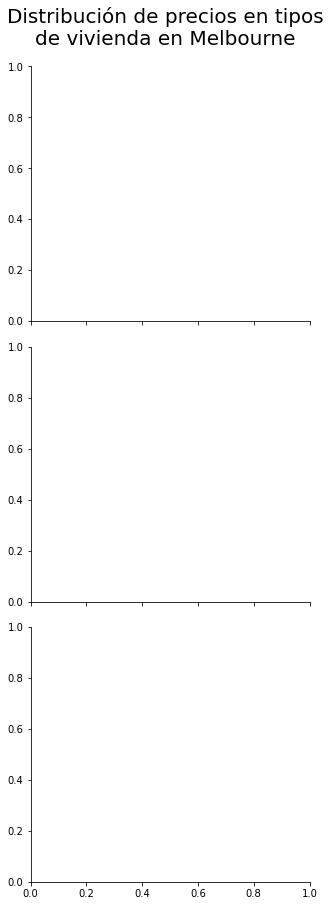

In [23]:
# Crear figure
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize = (5,15), sharex=True)
fig.subplots_adjust(hspace = 0.1)
fig.suptitle("Distribución de precios en tipos\nde vivienda en Melbourne", fontsize = 20, y = 0.935)
sns.despine()

In [24]:
# 2. y 3. Crear boxplot con eje x en 'type' y y en 'price' asi como titulo y anotaciones
sns.boxplot(data = df, x = 'price', y = 'type', ax = ax1)
ax1.set_ylabel(None)
ax1.set_xlabel(None)

Text(0.5, 577.2875, '')

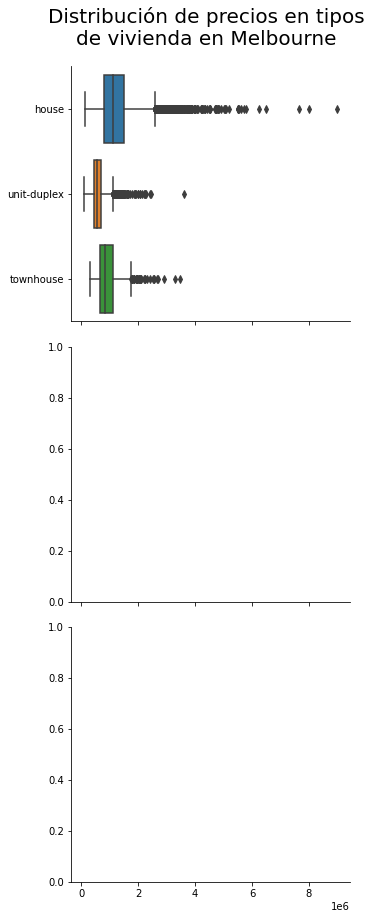

In [25]:
fig

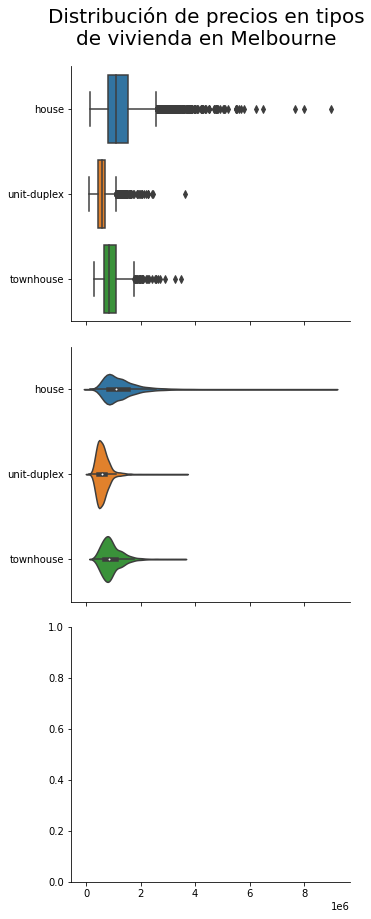

In [26]:
# 4. y 5. Crear violin plot con mismas variables y anotar titulo y anotaciones
sns.violinplot(data = df, x = 'price', y = 'type', ax = ax2)
ax2.set_ylabel(None)
ax2.set_xlabel(None)
fig

In [27]:
# 6. Comparar
sns.violinplot(data = df, x = 'price', y = 'type', ax = ax3)
sns.boxplot(data = df, x = 'price', y = 'type', ax = ax3)
ax3.set_ylabel(None)
ax3.set_xlabel(None)

Text(0.5, 16.200000000000017, '')

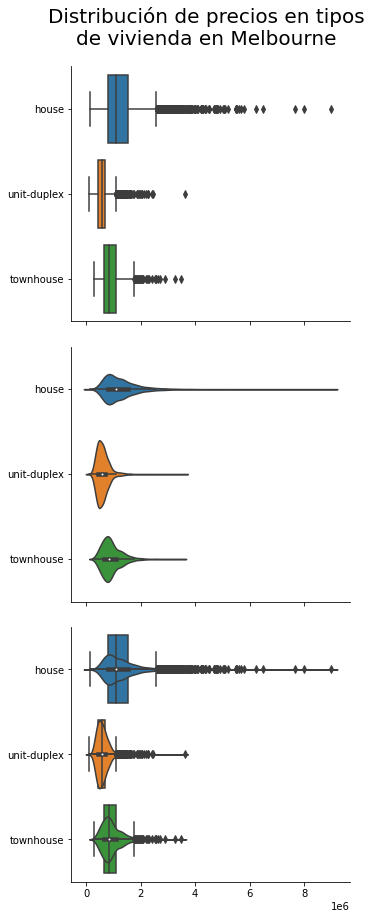

In [28]:
fig

***
***
***

## **Postwork**

 ## Nombre del Postwork: Exploración de Variables Categóricas y Análisis Multivariable

### OBJETIVO 

- Agregar anotaciones y títulos a las gráficas que hemos hecho hasta el momento
- Realizar gráficas de barras para explorar la distribución de variables categóricas
- Realizar tablas de contingencia y gráficas con múltiples axes para explorar dos o más variables categóricas
- Usar boxplots y violinplots para explorar variables numéricas segmentadas por variables categóricas

#### REQUISITOS 

- Tener un dataset limpio
- Tener una serie de preguntas que queremos contestar usando nuestro dataset
- Haber explorado ya la distribuciones de nuestras variables numéricas

#### DESARROLLO

En este Postwork vamos a explorar las distribuciones de las variables categóricas de nuestro dataset. En el postwork pasado exploramos las variables numéricas y ya deberías de tener una idea general bastante buena de cómo están organizadas. Ahora es momento de hacer análisis de variables categóricas y análisis multivariable. Realiza los siguientes pasos si tiene sentido aplicarlos a tu conjunto de datos:

1. Si ya tienes gráficas realizadas en Postworks anteriores, agrega títulos, anotaciones y leyendas donde sea necesario. También cambia el tamaño de las gráficas donde tenga sentido hacerlo.
2. Identifica todas las variables categóricas en tu dataset.
3. Utiliza gráficas de barras para explorar la distribución de tus variables categóricas.
4. Planea tu análisis multivariable: ¿qué combinaciones de variables categóricas podrían darme información útil acerca de la distribución de mis datos? ¿qué combinaciones de una variable numérica con una variable categórica podrían ser interesantes?
5. Utiliza tablas de contingencia y múltiples gráficas en la misma `figure` para explorar combinaciones de variables categóricas.
6. Utiliza boxplots y violinplots para explorar combinaciones de variables numéricas con variables categóricas.
7. De preferencia ve registrando por escrito (ahí mismo en tu Notebook) todos tus hallazgos. Describe qué vas descubriendo y qué podría significar.

¡Mucha suerte!